# Проектная работа: Анализ оттоков банковских клиентов.

**Цель работы:**  Разобраться в причинах оттока и создать рекомендации по его уменьшению.

# Введение

В «Метанпромбанк» необходимо провести анализ оттока клиентов и сегментирование пользователей банка. Сегментация покажет, как клиенты пользуются услугами банка.
Необходимо проанализировать взаимосвязи и создадить визуализации и презентацию.

В проэкте представлены следующие данные:
- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Equity` — количество баллов собственности
- `Balance` — баланс на счёте,
- `roducts` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Last_activity` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

<a id="q00"></a> 

**План иследования:**

**Шаг 1. Загрузка данных**
- [Загрузка данных](#q01)

**Шаг 2. Предобработка данных**
- [Проверка на пропуски, явные дублекаты, изменение названия столбцов](#q21)
- [Проверка на неявные дублекаты](#q22)
- [Создание дополнительных столбцов](#q23)

**Шаг 3. Анализ данных**
- [Анализ балов кредитного скорринга](#q31)
- [Анализ городов](#q32)
- [Анализ пола](#q33)
- [Анализ возраста](#q34)
- [Анализ количества балов собственности](#q35)
- [Анализ баланса на счете](#q36)
- [Анализ продуктов клиента](#q37)
- [Анализ наличия кредитной карты](#q38)
- [Анализ активности клиентов](#q39)
- [Анализ з/п клиентов](#q310)
- [Анализ ухода пользователей](#q311)

**Шаг 4. Детализирование исследования**
- [Анализ признаков в разрезе оттока.](#q41)
    - [Анализ балов кредитного скорринга в разрезе оттока.](#q411)
    - [Анализ городов в разрезе оттока.](#q412)
    - [Анализ пола в разрезе оттока.](#q413)
    - [Анализ возраста в разрезе оттока.](#q414)
    - [Анализ количества балов собственности в разрезе оттока.](#q415)
    - [Анализ баланса на счете в разрезе оттока.](#q416)
    - [Анализ продуктов клиента в разрезе оттока.](#q417)
    - [Анализ наличия кредитной карты в разрезе оттока.](#q418)
    - [Анализ активности клиентов в разрезе оттока.](#q419)
    - [Анализ з/п клиентов в разрезе оттока.](#q420)


- [Анализ портретов клиентов в разрезе оттока](#q42)
- [Корреляционный анализ](#q43)

**Шаг 5. Проверка статистических гипотиз**
- [Гипотиза о влиянии на отток количества баллов кредитного скорринга.](#q51)
- [Гипотиза о влиянии на отток количества количества сбережений на счете.](#q52)
- [Гипотиза о влиянии на отток заработной платы.](#q53)

**Шаг 6. Подведение итогов**
- [Промежуточные выводы](#q61)
- [Сегментация клиентов](#q62)
- [Приоритезация сигментов клиентов](#q63)
- [Рекомендации по оттоку клиентов](#q64)

**Шаг 7. Презинтация**
- [Презентация](#q71)

**Шаг 8. Выводы**
- [Выводы](#q81)

<a id="q01"></a> 

##  Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
#import phik
import scipy.stats as stats

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
data = pd.read_csv('C:/Users/user/Project/GitHub/Portfolio/csv/bank_scrooge.csv')

In [4]:
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1


Запуск библиотек и файла с данными

[Введение](#q00) [Вывод](#q81)

## Предобработка данных

<a id="q21"></a> 

### Проверка на пропуски, явные дублекаты, изменение названия столбцов

In [5]:
def preprocessing(x):
    print(f'таблица имеет следующий вид:')
    display(x.head())
    print('*'*100)
    print(f'таблица имеет {data.shape[0]} сторок и {data.shape[1]} столбцов')
    print(f'в таблице обнаружено дублекатов:{x.duplicated().sum()}')
    print('*'*100)
    print('в таблице обнаружены пропуски в следующих столбцах:')
    display(x.isna().sum())
    print('*'*100)
    print('Эти пропуски составлябт следующее количество в процентах')
    display((data.isna().mean()* 100).round(1))
    print('*'*100)
    print('столбцы имеют следующие типы:')
    display(x.dtypes)
    x.columns = [y.lower().replace(' ', '_') for y in x.columns.values] 
    print('*'*100)
    print('названия столбцов переписаны в нижнем регистре, пробелы заменены на нижнее подчеркивание')
    print('*'*100)
    display(x.info())

In [6]:
preprocessing(data)

таблица имеет следующий вид:


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1


****************************************************************************************************
таблица имеет 10000 сторок и 12 столбцов
в таблице обнаружено дублекатов:0
****************************************************************************************************
в таблице обнаружены пропуски в следующих столбцах:


USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

****************************************************************************************************
Эти пропуски составлябт следующее количество в процентах


USERID           0.00
score            0.00
city             0.00
gender           0.00
age              0.30
equity           0.00
balance         23.00
products         0.00
credit_card      0.00
last_activity    0.00
EST_SALARY       0.00
churn            0.00
dtype: float64

****************************************************************************************************
столбцы имеют следующие типы:


USERID             int64
score            float64
city              object
gender            object
age              float64
equity             int64
balance          float64
products           int64
credit_card        int64
last_activity      int64
EST_SALARY       float64
churn              int64
dtype: object

****************************************************************************************************
названия столбцов переписаны в нижнем регистре, пробелы заменены на нижнее подчеркивание
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non

None

In [7]:
data[data['balance']==0]['userid'].count()

2

In [8]:
data[(data['balance']<1000)&(data['balance']>0)]['userid'].count()

31

In [9]:
data[data['balance'].isnull()].describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,2295.00,2295.00,2279.00,2295.00,0.00,2295.00,2295.00,2295.00,2295.00,2295.00
mean,172069.45,865.35,42.09,0.05,NaN,1.16,0.82,0.55,226310.21,0.01
std,33337.08,89.60,11.94,0.23,NaN,0.40,0.39,0.50,199771.79,0.08
min,114182.00,642.00,18.00,0.00,NaN,0.00,0.00,0.00,20274.03,0.00
25%,143095.50,871.00,33.00,0.00,NaN,1.00,1.00,0.00,120347.70,0.00
50%,172659.00,903.00,40.00,0.00,NaN,1.00,1.00,1.00,174160.68,0.00
75%,201551.00,922.00,49.00,0.00,NaN,1.00,1.00,1.00,240014.99,0.00
max,229145.00,990.00,86.00,3.00,NaN,3.00,1.00,1.00,1333687.36,1.00


In [10]:
data[~(data['balance'].isnull())].describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,7705.00,7705.00,7695.00,7705.00,7705.00,7705.00,7705.00,7705.00,7705.00,7705.00
mean,171738.84,843.74,42.92,3.40,827794.31,2.08,0.64,0.52,124501.87,0.23
std,33819.78,55.33,12.24,1.58,1980614.15,0.76,0.48,0.50,104663.54,0.42
min,94561.00,689.00,18.00,0.00,0.00,1.00,0.00,0.00,2546.30,0.00
25%,142639.00,801.00,33.00,2.00,295554.16,2.00,0.00,0.00,67551.81,0.00
50%,172740.00,840.00,40.00,4.00,524272.20,2.00,1.00,1.00,106222.20,0.00
75%,201168.00,882.00,52.00,5.00,980705.85,2.00,1.00,1.00,155045.67,0.00
max,229136.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


In [11]:
#data.loc[data['balance'].isnull(), 'balance'] = -0.000001
data.isna().sum()

userid              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [12]:
data[data['age'].isnull()].describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,26.00,26.00,0.00,26.00,10.00,26.00,26.00,26.00,26.00,26.00
mean,194637.50,855.15,NaN,1.38,1250033.57,1.35,0.77,0.77,178585.20,0.04
std,31310.55,83.42,NaN,1.96,2265234.84,0.56,0.43,0.43,175135.55,0.20
min,127440.00,663.00,NaN,0.00,171510.23,1.00,0.00,0.00,55073.63,0.00
25%,185142.00,827.50,NaN,0.00,252326.77,1.00,1.00,1.00,77807.76,0.00
50%,208447.00,888.50,NaN,0.00,417361.11,1.00,1.00,1.00,142598.86,0.00
75%,219224.25,919.25,NaN,3.00,1039439.01,2.00,1.00,1.00,176991.69,0.00
max,228075.00,942.00,NaN,5.00,7601719.20,3.00,1.00,1.00,922080.25,1.00


In [13]:
data[~(data['age'].isnull())].describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9974.00,9974.00,9974.00,9974.00,7695.00,9974.00,9974.00,9974.00,9974.00,9974.00
mean,171755.22,848.68,42.73,2.63,827245.59,1.87,0.68,0.52,147786.81,0.18
std,33695.53,65.40,12.18,1.98,1980327.41,0.79,0.47,0.50,139285.51,0.39
min,94561.00,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00
25%,142760.00,802.00,33.00,0.00,295698.71,1.00,0.00,0.00,75251.66,0.00
50%,172643.00,853.00,40.00,3.00,524295.33,2.00,1.00,1.00,119626.79,0.00
75%,201163.75,900.00,51.00,4.00,980051.21,2.00,1.00,1.00,174499.81,0.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


In [14]:
data_clear_ear = data[~(data['age'].isnull())]
data_clear_ear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   float64
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1013.0+ KB


При просмотре данных у которых естть пропуски в столбце `баланс` мы видим следующие закономерности. У пользователей с пропусками выше среднее и медианна балов кредитного скорринга 865 и 903 против 843 и 840. Возраст в обоих группах одинаков. У клиентов с пропусками в среднеи 0 баллов собственности, в то время как у ледей без пропусков в среднем 3.5 балла собственности. В среднем клиенты с пропусками в балансе используют на 1 продукт банка меньше. И у них в 85% случаях есть кредитная карта, в то время как у людей без пропусков имеется кредитка в 65% слутаях. Активность в обоих группах примерно равна. З/п в среднем у клиентов с пропусками выше 220000 против 120000. Также данные клиенты практически не подвержены уходу 1% против 23% у клиентов без пропусков. Исходя из данных выявлена зависимость пропусков и данными в столбцах с Баллами собственности, бллами скорринга, количеством используемых продуктов, наличие кредитной карты и зароботной платой. Пропуски относятся к категории `MNAR`. Всего в данных 2295 пропусков, что составляет 23%. Также выявлено, что всего у 2х пользователей из 10000 на счете нет денег, а у 31 на счете меньше 1000 рублей. 

Несмотря на то, что пропусков много 23%, из за того, что относятся к категории `MNAR`, мной принято решение, пропуски не обрабатывать, так как обработка пропусков типа `MNAR` приводит к искажению распределения данных.

Пропуски в данных о возрасте накак не взаимосвязаны с данными в других столбцах, пропуски относятся к категории `MCAR` выявить приподу пропусков не возможн. 

Так как пропусков мало, всего 26 шт., что составляет 0,3% от общих данных и данные пропуски относятся к категории `MCAR`, мной принято решение, применить метод заполнения пропусков `Available-case analysis`. Эти пропуски не повлияют на дальнейшее иследование. Для анализа возроста пользователей будут использоваться данные без учета данных с пропксками data_clear_ear.

<a id="q22"></a> [Введение](#q00) [Вывод](#q81)

### Проверка на неявные дублекаты

In [15]:
data.head(3)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0


In [16]:
data.groupby('userid')['balance'].count().reset_index().sort_values('balance',ascending=False)[data.groupby('userid')['balance'].count().reset_index().sort_values('balance',ascending=False)['balance']==2].head()

,userid,balance
8546,214031,2
8197,210627,2
8912,217826,2
981,124450,2
2292,140377,2


In [17]:
data.groupby('userid')['balance'].count().reset_index().sort_values('balance',ascending=False)[data.groupby('userid')['balance'].count().reset_index().sort_values('balance',ascending=False)['balance']==2].userid.count()

38

In [18]:
data.groupby('userid').city.count().value_counts()

1    9854
2      73
Name: city, dtype: int64

In [19]:
data[data['userid']==149365]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
946,149365,877.00,Ярославль,М,41.00,5,819182.01,2,0,0,212316.47,1
8272,149365,793.00,Рыбинск,Ж,61.00,0,476496.99,2,1,1,46147.06,0


In [20]:
data[data['userid']==217826]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4623,217826,842.00,Ярославль,М,39.00,4,439747.65,2,0,1,116736.75,1
9406,217826,790.00,Рыбинск,Ж,46.00,4,430414.80,2,1,1,49400.37,0


In [21]:
data[data['userid']==219343]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1010,219343,921.00,Ярославль,Ж,33.00,0,NaN,1,1,0,159475.61,0
7248,219343,920.00,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0


In [22]:
duplecates = data.groupby('userid')['balance'].count().reset_index().sort_values('balance',ascending=False)[data.groupby('userid')['balance'].count().reset_index().sort_values('balance',ascending=False)['balance']==2].userid.unique()

In [23]:
data[data['userid'].isin (duplecates)].city.unique()

array(['Ярославль', 'Рыбинск'], dtype=object)

In [24]:
data[(data['userid'].isin (duplecates))&(data['city']=='Ярославль')]['userid'].count()

38

In [25]:
data.loc[(data['userid'].isin (duplecates))&(data['city']=='Ярославль'),'userid'] = data.loc[(data['userid'].isin (duplecates))&(data['city']=='Ярославль'),'userid'] * 10

In [26]:
data.groupby('userid').city.count().value_counts()

1    9930
2      35
Name: city, dtype: int64

В данных присутствуют 73 неявных дублеката. 73 пользователя из Ярославля и 73 пользователя Рыбинска. У которых продублированы индентификаторы пользователей. Скорее всего в разных филиалах в Ярославле и Рыбинске пользователям иногда проставляют одинаковые индентификаторы. Скорее всего неявные дубдекаты пользователей не помешают дальнейшему иследованию, но поменяем индентификаторы продублированным пользователям из Ярославля, тля того чтобы у каждого пользователя был уникальный индентификатор.

<a id="q23"></a> [Введение](#q00) [Вывод](#q81)

### Создание дополнительных столбцов(например для кодирования)

In [27]:
data.head(3)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0


In [28]:
data['city_copy'] = data['city']
data['gender_copy'] = data['gender']
data = pd.get_dummies(data, prefix=['gorod', 'pol'] ,  columns = ['city_copy','gender_copy'])
data.head(3)
data

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gorod_Ростов,gorod_Рыбинск,gorod_Ярославль,pol_Ж,pol_М
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.00,Рыбинск,М,27.00,1,78144.65,1,0,1,18943.64,0,0,1,0,0,1
9996,139170,894.00,Ярославль,М,46.00,0,NaN,1,1,0,196898.29,0,0,0,1,0,1
9997,115639,903.00,Ярославль,М,24.00,0,NaN,2,1,1,108905.09,0,0,0,1,0,1
9998,148700,777.00,Ярославль,Ж,68.00,3,865457.97,3,0,1,86874.90,0,0,0,1,1,0


Так как данные в столбщых `город` и `пол` котегориальные и неупорядоченные, то для их корреляции с другими числовыми данными создаем дополнительные столбцы посредством функции `pd.get_dummies`. создали дополнительные столбцы : `gorod_Ростов` `gorod_Рыбинск` `gorod_Ярославль` `pol_Ж` `pol_М` данные в которых принимают значения 0 если значение ложно и 1 если значение истинно.

[Введение](#q00) [Вывод](#q81)

## Анализ данных

<a id="q31"></a>

### Анализ балов кредитного скорринга

In [29]:
data.head(3)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gorod_Ростов,gorod_Рыбинск,gorod_Ярославль,pol_Ж,pol_М
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0,0,1,0,1,0


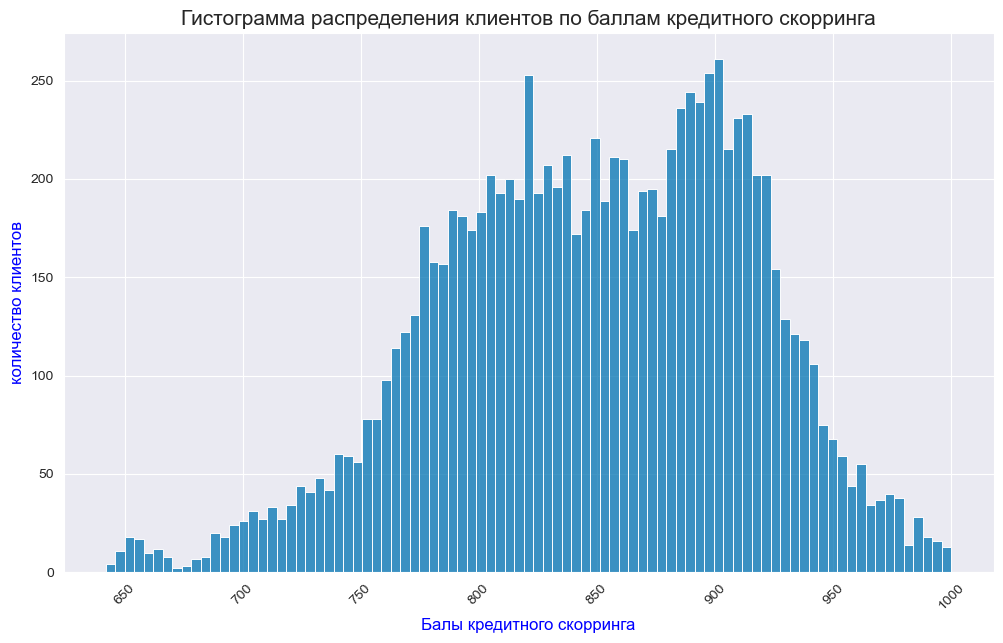

In [30]:
plt.figure(figsize=(12, 7))
sns.set_palette('colorblind') 
sns.set_style('darkgrid') 
sns.histplot(data=data['score'], bins=89)
plt.title('Гистограмма распределения клиентов по баллам кредитного скорринга', fontsize=15)
plt.xlabel('Балы кредитного скорринга', fontsize=12, color='blue')
plt.xticks(rotation=45)
plt.ylabel('количество клиентов', fontsize=12, color='blue')
plt.show()

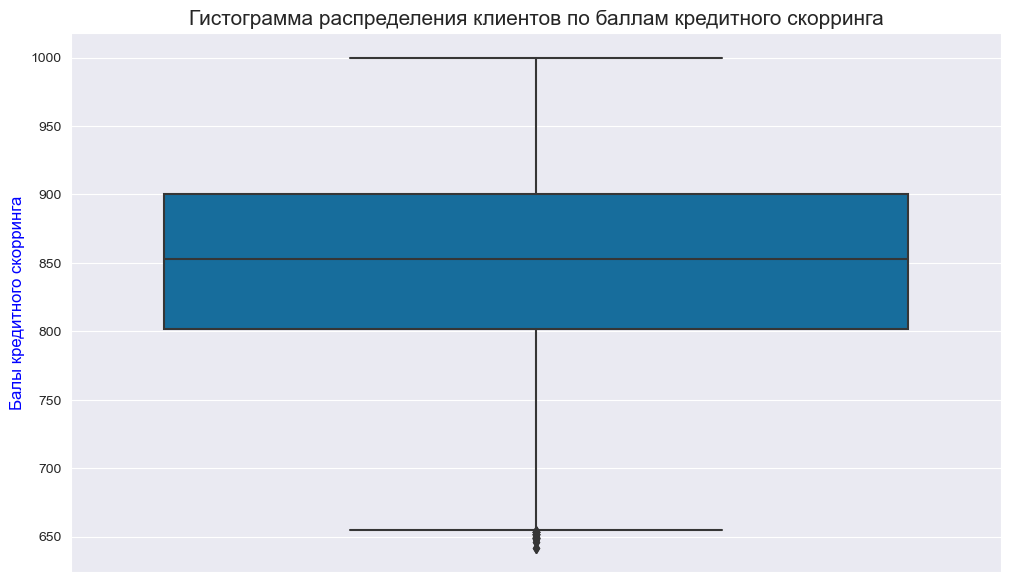

In [31]:
plt.figure(figsize=(12, 7))
sns.set_palette('colorblind') 
sns.set_style('darkgrid') 
sns.boxplot(y='score', data=data)
plt.title('Гистограмма распределения клиентов по баллам кредитного скорринга', fontsize=15)
plt.xlabel('', fontsize=12, color='blue')
plt.xticks(rotation=45)
plt.ylabel('Балы кредитного скорринга', fontsize=12, color='blue')
plt.show()

In [32]:
data.score.describe()

count   10000.00
mean      848.70
std        65.45
min       642.00
25%       802.00
50%       853.00
75%       900.00
max      1000.00
Name: score, dtype: float64

In [33]:
data_clear = data[data['score']> 650]

In [34]:
data_clear.score.describe()

count   9985.00
mean     849.00
std       65.03
min      651.00
25%      802.00
50%      853.00
75%      900.00
max     1000.00
Name: score, dtype: float64

В среднем клиенты имеют 848,7 балов кредитного скорринга, менианна равна 853 бала, скользователи с количеством балов менне 650 можго считать выбросами.

<a id="q32"></a> [Введение](#q00) [Вывод](#q81)

### Анализ городов

In [35]:
data.head(3)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gorod_Ростов,gorod_Рыбинск,gorod_Ярославль,pol_Ж,pol_М
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0,0,1,0,1,0


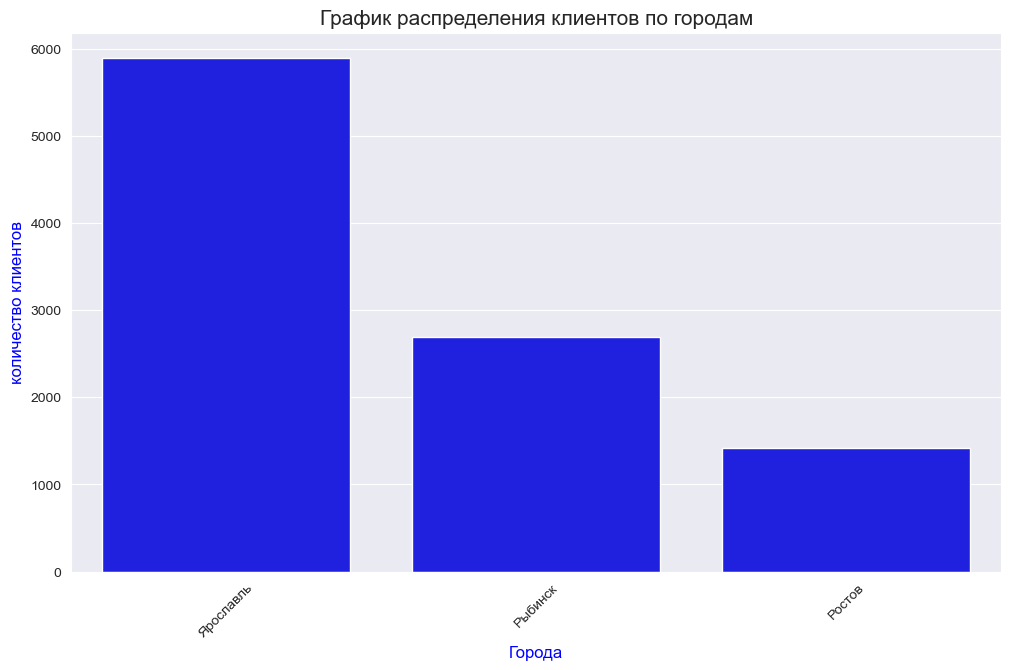

In [36]:
plt.figure(figsize=(12, 7))
sns.set_palette('colorblind') 
sns.set_style('darkgrid') 
sns.barplot (x="city", y='userid', color='blue',  data=data.groupby('city').userid.count().reset_index().sort_values('userid', ascending=False))
plt.title('График распределения клиентов по городам', fontsize=15)
plt.xlabel('Города', fontsize=12, color='blue')
plt.xticks(rotation=45)
plt.ylabel('количество клиентов', fontsize=12, color='blue')
plt.show()

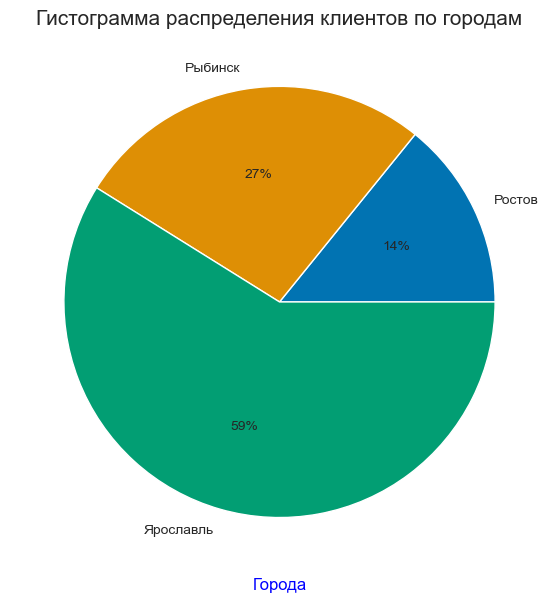

In [37]:
plt.figure(figsize=(12, 7))
sns.set_palette('colorblind') 
sns.set_style('darkgrid') 
plt.pie(data = data.groupby('city').userid.count().reset_index(), x ='userid',  labels='city', autopct='%.0f%%')
plt.title('Гистограмма распределения клиентов по городам', fontsize=15)
plt.xlabel('Города', fontsize=12, color='blue')
plt.show()

In [38]:
data.groupby('city').userid.count().reset_index()

,city,userid
0,Ростов,1417
1,Рыбинск,2695
2,Ярославль,5888


Больше всего клиентов представленно из Ярославля, 5888 клиента, затем идет Рыбинск 2695 клиентов и меньше всего в Ростове 1417 клиенов.

<a id="q33"></a> [Введение](#q00) [Вывод](#q81)

### Анализ пола

In [39]:
data.head(3)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gorod_Ростов,gorod_Рыбинск,gorod_Ярославль,pol_Ж,pol_М
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0,0,1,0,1,0


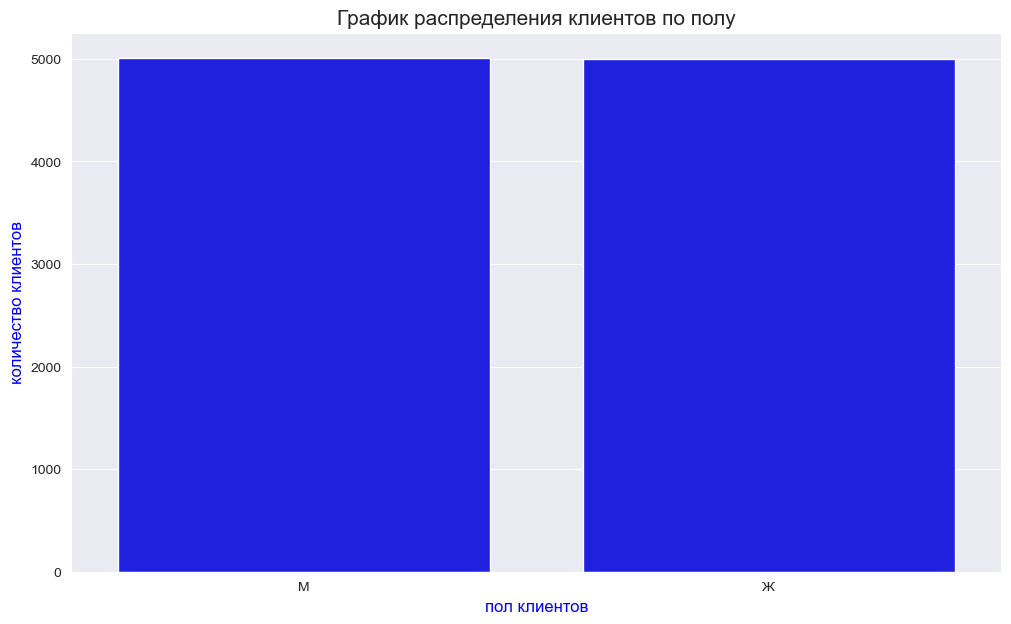

In [40]:
plt.figure(figsize=(12, 7))
sns.set_palette('colorblind') 
sns.set_style('darkgrid') 
sns.barplot (x="gender", y='userid', color='blue',  data=data.groupby('gender').userid.count().reset_index().sort_values('userid', ascending=False))
plt.title('График распределения клиентов по полу', fontsize=15)
plt.xlabel('пол клиентов', fontsize=12, color='blue')
plt.xticks(rotation=0)
plt.ylabel('количество клиентов', fontsize=12, color='blue')
plt.show()

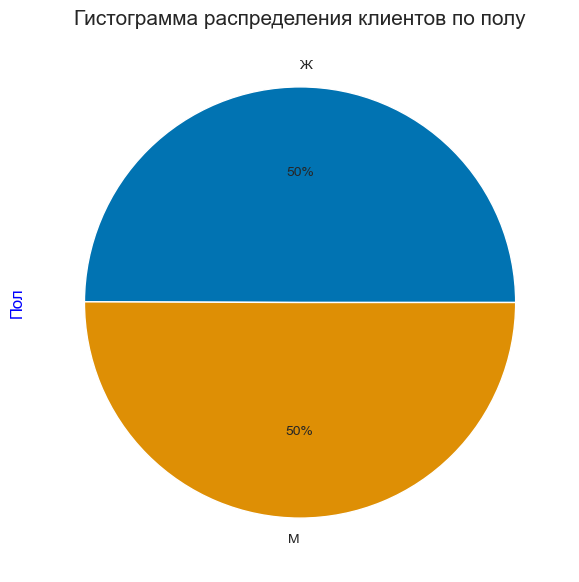

In [41]:
plt.figure(figsize=(12, 7))
sns.set_palette('colorblind') 
sns.set_style('darkgrid') 
plt.pie(data = data.groupby('gender').userid.count().reset_index(), x ='userid',  labels='gender', autopct='%.0f%%')
plt.title('Гистограмма распределения клиентов по полу', fontsize=15)
plt.ylabel('Пол', fontsize=12, color='blue')
plt.show()

In [42]:
data.groupby('gender')['userid'].count().reset_index().sort_values('userid', ascending=False)

,gender,userid
1,М,5005
0,Ж,4995


Мужчины и женщины распределены поравну между клиентами банка.

<a id="q34"></a> [Введение](#q00) [Вывод](#q81)

### Анализ возраста

In [43]:
data_clear_ear.head(3)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0


In [44]:
data_clear_ear.groupby('age')['userid'].count().reset_index().sort_values('userid', ascending=False)

,age,userid
18,36.00,414
19,37.00,402
15,33.00,392
17,35.00,388
16,34.00,384
...,...,...
65,83.00,3
61,79.00,2
64,82.00,2
66,84.00,2


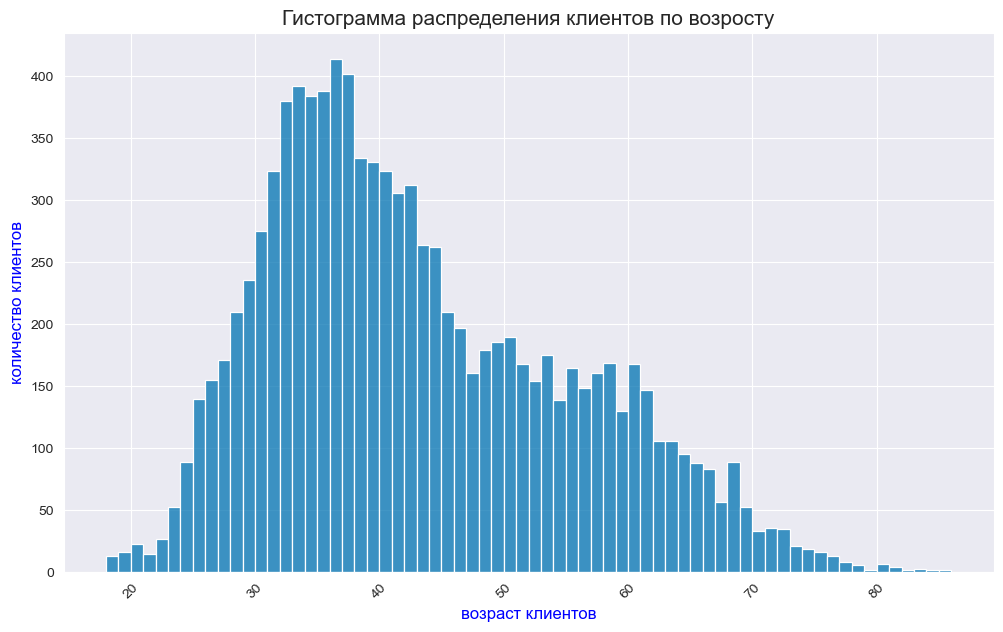

In [45]:
plt.figure(figsize=(12, 7))
sns.set_palette('colorblind') 
sns.set_style('darkgrid') 
sns.histplot(data=data['age'], bins=68)
plt.title('Гистограмма распределения клиентов по возросту', fontsize=15)
plt.xlabel('возраст клиентов', fontsize=12, color='blue')
plt.xticks(rotation=45)
plt.ylabel('количество клиентов', fontsize=12, color='blue')
plt.show()

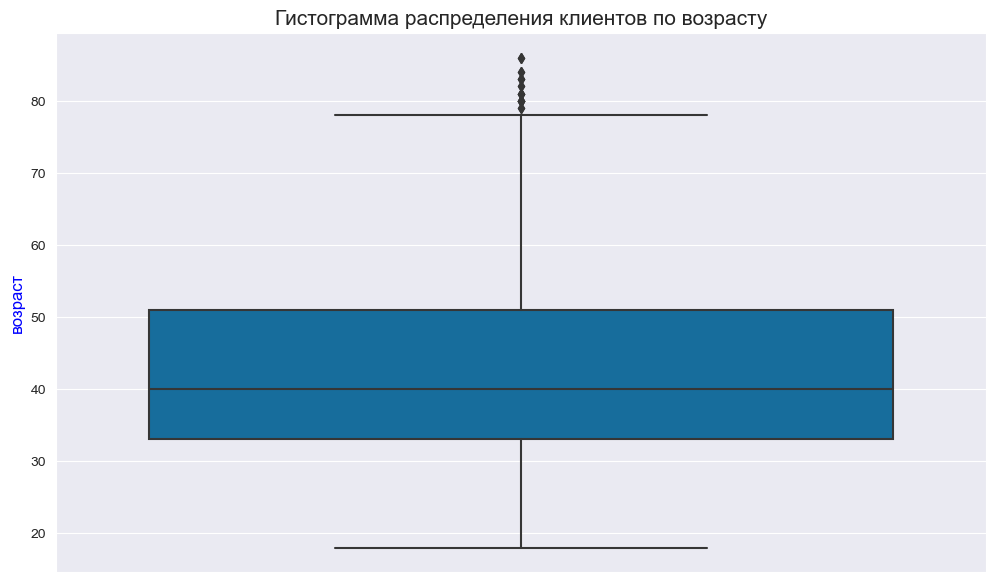

In [46]:
plt.figure(figsize=(12, 7))
sns.set_palette('colorblind') 
sns.set_style('darkgrid') 
sns.boxplot(y='age', data=data)
plt.title('Гистограмма распределения клиентов по возрасту', fontsize=15)
plt.xlabel('', fontsize=12, color='blue')
plt.xticks(rotation=45)
plt.ylabel('возраст', fontsize=12, color='blue')
plt.show()

In [47]:
data.age.describe()

count   9974.00
mean      42.73
std       12.18
min       18.00
25%       33.00
50%       40.00
75%       51.00
max       86.00
Name: age, dtype: float64

In [48]:
data_clear = data_clear[data_clear['age']<80]

In [49]:
data_clear.age.describe()

count   9939.00
mean      42.65
std       12.06
min       18.00
25%       33.00
50%       40.00
75%       51.00
max       79.00
Name: age, dtype: float64

Клиенты банка, у которых в данных прописан возраст, представлены возрастомот 18 до 86 лет. в среднем возраст клиентов составляет 42,7 года медиана 40 лет. Выбросов по возрасту не много. Клиенты возрастом старше 78 лет являются выбросами. Всего клиентов с данными о возрасте 9974.

<a id="q35"></a> [Введение](#q00) [Вывод](#q81)

### Анализ количества балов собственности

In [50]:
data.head(3)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gorod_Ростов,gorod_Рыбинск,gorod_Ярославль,pol_Ж,pol_М
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0,0,1,0,1,0


In [51]:
data.equity.unique()

array([1, 5, 0, 4, 3, 2, 6, 7, 8, 9], dtype=int64)

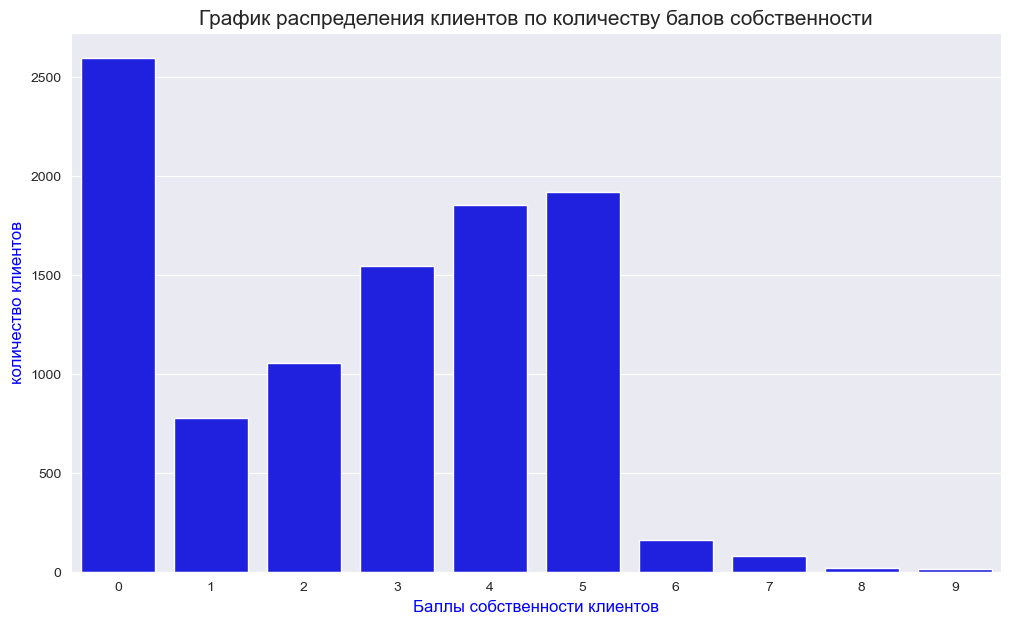

In [52]:
plt.figure(figsize=(12, 7))
sns.set_palette('colorblind') 
sns.set_style('darkgrid') 
sns.barplot (x="equity", y='userid', color='blue',  data=data.groupby('equity').userid.count().reset_index())
plt.title('График распределения клиентов по количеству балов собственности', fontsize=15)
plt.xlabel('Баллы собственности клиентов', fontsize=12, color='blue')
plt.xticks(rotation=0)
plt.ylabel('количество клиентов', fontsize=12, color='blue')
plt.show()

In [53]:
data.groupby('equity')['userid'].count().reset_index()

,equity,userid
0,0,2592
1,1,774
2,2,1052
3,3,1543
4,4,1850
5,5,1918
6,6,161
7,7,80
8,8,17
9,9,13


Больше всего клиентов имеют 0 балов собственности их количество составляет 2592 человек. Затем идет резкий спад и количество челове и меющих 1 бал собственности сотавляет 774 человеко, Далее количество людей равномерно увеличивается относительно балов собственности вплоть до 5и баллов 1052 человека с 2я балами, 1543 человека с 3я балами, 1850 человек с 4я балами, и 1918 человек с 5ю балами. Людес с 6ю, 7ю, 8ю и 9ю баллами очень мало, максисум у 6и бальных, он составляет 161 человек

<a id="q36"></a> [Введение](#q00) [Вывод](#q81)

### Анализ баланса на счете

In [54]:
data.head(3)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gorod_Ростов,gorod_Рыбинск,gorod_Ярославль,pol_Ж,pol_М
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0,0,1,0,1,0


In [ ]:
plt.figure(figsize=(12, 7))
sns.set_palette('colorblind') 
sns.set_style('darkgrid') 
sns.histplot(data=data['balance'])
plt.title('Гистограмма распределения клиентов по балансу на счете', fontsize=15)
plt.xlabel('баланс на счете клиентов', fontsize=12, color='blue')
plt.xticks(rotation=45)
plt.ylabel('количество клиентов', fontsize=12, color='blue')
#plt.xlim(0, 1500000)
plt.show()

In [ ]:
plt.figure(figsize=(12, 7))
sns.set_palette('colorblind') 
sns.set_style('darkgrid') 
sns.histplot(data=data['balance'], bins=3000)
plt.title('Гистограмма распределения клиентов по балансу на счете', fontsize=15)
plt.xlabel('возраст клиентов', fontsize=12, color='blue')
plt.xticks(rotation=45)
plt.ylabel('баланс на счете', fontsize=12, color='blue')
plt.xlim(0, 2000000)
plt.show()

In [ ]:
data_clear_balance = data[~(data['balance'].isna())]

In [ ]:
plt.figure(figsize=(12, 7))
sns.set_palette('colorblind') 
sns.set_style('darkgrid') 
sns.boxplot(y='balance', data=data)
plt.title('Диаграмма размаха распределения клиентов по балансу на счете', fontsize=15)
plt.xlabel('', fontsize=12, color='blue')
plt.xticks(rotation=45)
plt.ylabel('баланс на счете', fontsize=12, color='blue')
plt.show()

In [ ]:
plt.figure(figsize=(12, 7))
sns.set_palette('colorblind') 
sns.set_style('darkgrid') 
sns.boxplot(y='balance', data=data)
plt.title('Диаграмма размаха распределения клиентов по балансу на счете', fontsize=15)
plt.xlabel('', fontsize=12, color='blue')
plt.xticks(rotation=45)
plt.ylabel('баланс на счете', fontsize=12, color='blue')
plt.ylim(0, 2200000)
plt.show()

In [ ]:
data.balance.describe()

In [ ]:
data_clear = data_clear[data_clear['balance']< 2200000]

In [ ]:
data_clear.balance.describe()

В среднем у клиентов баланс на счете составляет 625000 руб. медиана 490000 руб. минимальный 0, максимальный почти 120 000 000 руб. Баланс свыше 2 200 000 является выбросом, обрезаем их

<a id="q37"></a> [Введение](#q00) [Вывод](#q81)

### Анализ продуктов клиента

In [ ]:
data.head(3)

In [ ]:
data.products.unique()

In [ ]:
plt.figure(figsize=(12, 7))
sns.set_palette('colorblind') 
sns.set_style('darkgrid') 
sns.barplot (x="products", y='userid', color='blue',  data=data.groupby('products').userid.count().reset_index())
plt.title('График распределения клиентов по количеству используемых продуктов', fontsize=15)
plt.xlabel('количества используемых продуктов', fontsize=12, color='blue')
plt.xticks(rotation=0)
plt.ylabel('количество клиентов', fontsize=12, color='blue')
plt.show()

In [ ]:
plt.figure(figsize=(12, 7))
sns.set_palette('colorblind') 
sns.set_style('darkgrid') 
plt.pie(data = data.groupby('products').userid.count().reset_index().sort_values('userid'), x ='userid',  labels='products', autopct='%.0f%%')
plt.title('Диаграмма распределения клиентов по количеству используемых продуктов', fontsize=15)
plt.ylabel('количество используемых продуктов', fontsize=12, color='blue')
plt.show()

In [ ]:
data[data['products']==0]

In [ ]:
data.groupby('products').userid.count().reset_index()

все клиенты кроме 1го работают минимум с одним продуктом банка, Больше ксего клиентов работают с 2я продуктами 5126 клиентов, затем идут клиенты у которых 1 продукт 3341 клиент, затем клиенты с 3я продуктами 1039 клиентов, с 4я продуктами 474 клиента и с 5ю продуктами 19 клиентов.

<a id="q38"></a> [Введение](#q00) [Вывод](#q81)

### Анализ наличия кредитной карты

In [ ]:
data.head(3)

In [ ]:
plt.figure(figsize=(12, 7))
sns.set_palette('colorblind') 
sns.set_style('darkgrid') 
sns.barplot(x="credit_card", y='userid', color='blue',  data=data.groupby('credit_card').userid.count().reset_index(), order=data.groupby('credit_card').userid.count().reset_index().sort_values('userid', ascending=False).credit_card)
plt.title('График распределения клиентов по наличию кредитной карты', fontsize=15)
plt.xlabel('наличие кредитной карты', fontsize=12, color='blue')
plt.xticks(rotation=0)
plt.ylabel('количество клиентов', fontsize=12, color='blue')
plt.show()

In [ ]:
plt.figure(figsize=(12, 7))
sns.set_palette('colorblind') 
sns.set_style('darkgrid') 
plt.pie(data = data.groupby('credit_card').userid.count().reset_index().sort_values('userid'), x ='userid',  labels='credit_card', autopct='%.0f%%')
plt.title('Диаграмма распределения клиентов по наличию кредитной карты', fontsize=15)
plt.ylabel('наличие кредитной карты', fontsize=12, color='blue')
plt.show()

In [ ]:
data.groupby('credit_card').userid.count().reset_index().sort_values('userid', ascending=False)

Из 10000 клиентов кредитная карта естьу 6804 клиентов и кредитной карты нет у 3196 клиентов

<a id="q39"></a> [Введение](#q00) [Вывод](#q81)

### Анализ активности клиентов

In [ ]:
data.head(3)

In [ ]:
plt.figure(figsize=(12, 7))
sns.set_palette('colorblind') 
sns.set_style('darkgrid') 
sns.barplot (y='userid', x="last_activity", color='blue',  data=data.groupby('last_activity')['userid'].count().reset_index())
plt.title('График распределения клиентов по их активности', fontsize=15)
plt.xlabel('Активность клиенов', fontsize=12, color='blue')
plt.xticks(rotation=0)
plt.ylabel('количество клиентов', fontsize=12, color='blue')

plt.show()

In [ ]:
plt.figure(figsize=(12, 7))
sns.set_palette('colorblind') 
sns.set_style('darkgrid') 
plt.pie(data = data.groupby('last_activity').userid.count().reset_index().sort_values('userid'), x ='userid',  labels='last_activity', autopct='%.0f%%')
plt.title('Диаграмма распределения клиентов по их активности', fontsize=15)
plt.ylabel('активность клиентов', fontsize=12, color='blue')
plt.show()

In [ ]:
data.groupby('last_activity')['userid'].count().reset_index()

Из 10000 клиентов 4765 не активны и 5235 клиентов активны.

<a id="q310"></a> [Введение](#q00) [Вывод](#q81)

### Анализ з/п клиентов

In [ ]:
data.head(3)

In [ ]:
plt.figure(figsize=(12, 7))
sns.set_palette('colorblind') 
sns.set_style('darkgrid') 
sns.histplot(data=data['est_salary'])
plt.title('Гистограмма распределения клиентов по зароботной плате', fontsize=15)
plt.xlabel('заработная плата', fontsize=12, color='blue')
plt.xticks(rotation=0)
plt.ylabel('количество клиентов', fontsize=12, color='blue')
plt.show()

In [ ]:
plt.figure(figsize=(12, 7))
sns.set_palette('colorblind') 
sns.set_style('darkgrid') 
sns.histplot(data=data['est_salary'])
plt.title('Гистограмма распределения клиентов по зароботной плате', fontsize=15)
plt.xlabel('заработная плата', fontsize=12, color='blue')
plt.xticks(rotation=0)
plt.ylabel('количество клиентов', fontsize=12, color='blue')
plt.xlim(0, 500000)
plt.show()

In [ ]:
plt.figure(figsize=(12, 7))
sns.set_palette('colorblind') 
sns.set_style('darkgrid') 
sns.boxplot(y='est_salary', data=data)
plt.title('Диаграмма размаха распределения клиентов по заработной плате', fontsize=15)
plt.xlabel('', fontsize=12, color='blue')
plt.ylabel('заработная плата', fontsize=12, color='blue')
plt.show()

In [ ]:
plt.figure(figsize=(12, 7))
sns.set_palette('colorblind') 
sns.set_style('darkgrid') 
sns.boxplot(y='est_salary', data=data)
plt.title('Диаграмма размаха распределения клиентов по заработной плате', fontsize=15)
plt.xlabel('', fontsize=12, color='blue')
plt.ylabel('заработная плата', fontsize=12, color='blue')
plt.ylim(0, 400000)
plt.show()

In [ ]:
data.est_salary.describe()

In [ ]:
data_clear = data_clear[data_clear['est_salary']<350000]

In [ ]:
data_clear.est_salary.describe()

В среднем зароботная плата составляет 110000 руб, медиана равна 102000 руб, это с вязано с большим количеством выбросов, зарплата выше 300000 является выбросами.минимальная зарплата составляет 2546 руб. максимальная 350000 руб. 

<a id="q311"></a> [Введение](#q00) [Вывод](#q81)

### Анализ ухода пользователей

In [ ]:
data.head(3)

In [ ]:
plt.figure(figsize=(12, 7))
sns.set_palette('colorblind') 
sns.set_style('darkgrid') 
sns.barplot (x="churn", y='userid', color='blue',  data=data.groupby('churn').userid.count().reset_index())
plt.title('График распределения клиентов по его уходу', fontsize=15)
plt.xlabel('уход клиента', fontsize=12, color='blue')
plt.xticks(rotation=0)
plt.ylabel('количество клиентов', fontsize=12, color='blue')
plt.show()

In [ ]:
plt.figure(figsize=(12, 7))
sns.set_palette('colorblind') 
sns.set_style('darkgrid') 
plt.pie(data = data.groupby('churn').userid.count().reset_index().sort_values('userid'), x ='userid',  labels='churn', autopct='%.0f%%')
plt.title('Диаграмма распределения клиентов по его уходу', fontsize=15)
plt.ylabel('уход клиентов', fontsize=12, color='blue')
plt.show()

In [ ]:
data.groupby('churn')['userid'].count().reset_index()

Всего в данных 1820 клиентов ушло, что составляет 18% осталось 8120 клиентов 82%.

[Введение](#q00) [Вывод](#q81)

## Детализирование исследования

<a id="q41"></a> 

### анализ признаков в разрезе оттока.

<a id="q411"></a> 

#### Анализ балов кредитного скоррингав разрезе оттока.


In [ ]:
data.head(3)

In [ ]:
def contin_analysis(datax, xx, binsx=None, xlimx=None):
    plt.figure(figsize=(12, 7))
    sns.set_palette('colorblind') 
    sns.set_style('darkgrid') 
    sns.histplot(data=datax, x=xx, bins=binsx, hue='churn', stat="density", common_norm=False)
    plt.title(f'Гистограмма распределения клиентов по "{xx}" в разрезе оттока ', fontsize=15)
    plt.xlabel(f'{xx}', fontsize=12, color='blue')
    plt.xticks(rotation=45)
    plt.ylabel('плотность распределения клиентов', fontsize=12, color='blue')
    plt.xlim(xlimx)
    plt.show()
    plt.figure(figsize=(12, 7))
    sns.set_palette('colorblind') 
    sns.set_style('darkgrid') 
    sns.boxplot(y=xx, data=datax, x='churn')
    plt.title(f'Диаграмма распределения клиентов по "{xx}" в разрезе оттока', fontsize=15)
    plt.xlabel('', fontsize=12, color='blue')
    plt.xticks(rotation=0)
    plt.ylim(xlimx)
    plt.ylabel(f'{xx}', fontsize=12, color='blue')
    plt.show()
    return datax.pivot_table(index='churn', values=xx, aggfunc=('count', 'mean', 'median', 'max', 'min'))
        
    

In [ ]:
contin_analysis(data, 'score', 51)

In [ ]:
contin_analysis(data_clear, 'score', 51)

Среднее количество баллов скорринга очень близко к медианам балов скорринга в обоих группах. У лояльнызх пользователей составляет порядка 845 балов, у ушедших пользователей 863 балла. На гистограмме видно, что большенство ушедших клиентов превосходят в количестве лояльных в диапазоне от 840 до 910 баллов. А Лояльных пользователей больше у пользователей в диапазоне от 680 до 840 баллов.

у данных без выбросов среднне и медиана лояльных пользователей равны 834.33 и 830.00, а среднее и медиана ушедших пользователей равна 856.85 и 860.00

<a id="q412"></a> [Введение](#q00) [Вывод](#q81)

#### Анализ городов в разрезе оттока.


In [ ]:
data.head(3)

In [ ]:
def deskret_analysis(datax, xx):
    find = datax.pivot_table(index=xx, columns='churn', values='userid', aggfunc=('count')).reset_index()
    find.columns = [xx, 'klient', 'not_klient']
    find['klient%'] = (((find['klient']*100)/find['klient'].sum()).round(2)).astype('str') + ('%')
    find['not_klient%'] = (((find['not_klient']*100)/find['not_klient'].sum()).round(2)).astype('str') + ('%') 
    find['difference'] = ((((find['klient']*100)/find['klient'].sum()) - ((find['not_klient']*100)/find['not_klient'].sum())).round(2)).astype('str') + ('%') 
    find['not_klient_mean'] = find['not_klient']/(find['klient'] + find['not_klient'])
    find['churn_mean'] = find['not_klient'].sum()/(find['klient'].sum() + find['not_klient'].sum())
    find['difference_mean'] = find['churn_mean'] - find['not_klient_mean']
    
    plt.figure(figsize=(12, 7))
    sns.set_palette('colorblind') 
    sns.set_style('darkgrid') 
    sns.barplot (x=xx, y='userid', hue='churn',  data=datax.groupby([xx,'churn']).userid.count().reset_index().sort_values('userid', ascending=False))
    plt.title(f'График распределения клиентов по "{xx}"', fontsize=15)
    plt.xlabel(f'{xx}', fontsize=12, color='blue')
    plt.xticks(rotation=0)
    plt.ylabel('количество клиентов', fontsize=12, color='blue')
    plt.show()
    
    plt.figure(figsize=(12, 7))
    sns.set_palette('colorblind') 
    sns.set_style('darkgrid') 
    sns.barplot (x=xx,  y='churn',  color='blue', data=datax)
    plt.title(f'График зависимости оттока клиентов по "{xx}"', fontsize=15)
    plt.xlabel(f'{xx}', fontsize=12, color='blue')
    plt.xticks(rotation=0)
    plt.ylabel('отток клиентов', fontsize=12, color='blue')
    plt.axhline(y=0.5, color='red', label='50% уровень оттока клиентов')
    plt.axhline(y=datax.churn.mean(), color='orange', label='средний уровень оттока клиентов')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(12, 7))
    plt.subplot(1, 2, 1)
    sns.set_palette('colorblind') 
    sns.set_style('darkgrid') 
    plt.pie(data = datax[datax['churn']==0].groupby(xx).userid.count().reset_index(), x ='userid',  labels=xx,  autopct='%.0f%%')
    plt.title(f'Диаграмма распределения оставшихся \n клиентов по "{xx}" в разрезе оттока', fontsize=15)
    plt.ylabel(f'{xx}', fontsize=12, color='blue')
    plt.subplot(1, 2, 2)
    sns.set_palette('colorblind') 
    sns.set_style('darkgrid') 
    plt.pie(data = datax[datax['churn']==1].groupby(xx).userid.count().reset_index(), x ='userid',  labels=xx,  autopct='%.0f%%')
    plt.title(f'Диаграмма распределения ушедших \n клиентов по "{xx}" в разрезе оттока', fontsize=15)
    plt.ylabel(f'{xx}', fontsize=12, color='blue')
    plt.show()   
    return find
    

In [ ]:
deskret_analysis(data, 'city')

In [ ]:
deskret_analysis(data_clear, 'city')

In [ ]:
data.groupby('city').userid.count()

In [ ]:
data.churn.mean()

В разрезе оттока клиенты из разных городов примерно в равной доле лояльны. Средний уровень клиенов в Ростове и Ярославле составляет 0,19. в Рыбинске 0,16. Разница не превышает 0,02. Доля отточных клиентов относительно лояльных примерно равна и не превышает 5,6%

Для данных без выбросов изменения не критичны

<a id="q413"></a> [Введение](#q00) [Вывод](#q81)

#### Анализ пола в разрезе оттока.


In [ ]:
data.head(3)

In [ ]:
deskret_analysis(data, 'gender')

In [ ]:
deskret_analysis(data_clear, 'gender')

Средний уровень оттока относительно пола у мужчин выше и составляет 0,24 против 0,13 у женщин. При этом доля отточных клиентов относительно лояльных составляет 18%  

Данные без выбросов еще более яркие

<a id="q414"></a> [Введение](#q00) [Вывод](#q81)

#### Анализ возраста в разрезе оттока.


In [ ]:
data.head(3)

In [ ]:
contin_analysis(data_clear_ear, 'age', 34)

In [ ]:
contin_analysis(data_clear, 'age', 31)

Средний возраст у отточных клиентов ниже среднего возраста у лояльных клиентов и составляет 41,5 года против 43. Клиенты в возрасте от 25 до 35 больше подвержены оттоку. От 35 до 48 более лояльны. От 48 до 60 уходят и от 63 до 73 более лояльны.

<a id="q415"></a> [Введение](#q00) [Вывод](#q81)

#### Анализ количества балов собственности в разрезе оттока.


In [ ]:
data.head(3)

In [ ]:
data.churn.mean()

In [ ]:
deskret_analysis(data, 'equity')

In [ ]:
deskret_analysis(data_clear, 'equity')

Самые лояльные клиенты имеют, имеющие 0 балов собственности, обладают наивысшей разницей в среднем уровне оттока 0,15. Разница между отточными и лояльными клиентами составляет 25%. Самые уходящие, обладающие 5ю балами собственности, имеют разницу в среднем уровне оттока -0,12. И Разница между отточными и лояльными клиентами составляет 15%, Все клиенты с количеством балов собственности более 3 обладают большим уровнем чем средний уровень оттока максисум у 9и бальных клиентов разница составляеи -0,36, но таких клиентов очень мало. 

<a id="q416"></a> [Введение](#q00) [Вывод](#q81)

#### Анализ баланса на счете в разрезе оттока.


In [ ]:
data.head(3)

In [ ]:
contin_analysis(data, 'balance', 1000)

In [ ]:
contin_analysis(data, 'balance', 1000, (0, 3000000))

In [ ]:
contin_analysis(data_clear, 'balance', 15)

Клиенты у которых баланс на счете менее 700000 руб Более лояльны. Клиенты с балансом более 1000000 руб склонны к уходу. Почти все клиенты с балансом более 1500000 руб ушли. Средний баланс у лояльных клиентов составляет 730000 руб медиана 475000 руб. у ушедших клиентов средний баланс составляет 1130000 руб медиана 780000 руб.

Для клиентов без выбросов среднее и медиана лояльных равна 576867.38 и 458635.60, среднее и медиана ушедших равна 791603.14 и 683179.39

<a id="q417"></a> [Введение](#q00) [Вывод](#q81)

#### Анализ продуктов клиента в разрезе оттока.


In [ ]:
data.head(3)

In [ ]:
data = data[data['products']>0]

In [ ]:
deskret_analysis(data, 'products')

In [ ]:
deskret_analysis(data_clear, 'products')

Ушедшими являются большинство клиентов пользующихся 4я продуктами банка разница между средним уревнем ухода составляет -0,45 при разнице в долях -14,3%. Самыми лояльными являются клиенты с одним кподуктом  разница со средним уровнем составляет 0,11. при разнице в долях 25%. Ушедшие клиенты также использовали 5 и 3 продукта банка.

данные без выбросов не изменили показатели

<a id="q418"></a> [Введение](#q00) [Вывод](#q81)

#### Анализ наличия кредитной карты в разрезе оттока.


In [ ]:
data.head(3)

In [ ]:
deskret_analysis(data, 'credit_card')

In [ ]:
deskret_analysis(data_clear, 'credit_card')

Клиенты без кредитной карты чаще уходят, клиенты использующие кредитную карту в своем большинстве лояльны банку.Доля этих клиентов выше на 15%

данные без выбросов не изменили показатели

<a id="q419"></a> [Введение](#q00) [Вывод](#q81)

#### Анализ активности клиентов в разрезе оттока.


In [ ]:
data.head(3)

In [ ]:
deskret_analysis(data, 'last_activity')

In [ ]:
deskret_analysis(data_clear, 'last_activity')

Активные клиенты более склонны к уходу, разница со средним более на 0,06 при меньшей разницей в долях на 21,5%

данные без выбросов сделали показатели ярче

<a id="q420"></a> [Введение](#q00) [Вывод](#q81)

#### Анализ з/п клиентов в разрезе оттока.


In [ ]:
data.head(3)

In [ ]:
contin_analysis(data, 'est_salary', 40, (0, 400000))

In [ ]:
contin_analysis(data_clear, 'est_salary', 15)

Клиенты с заработной платой до 75000руб лояльны  банку. Клиенты с зарплатой более 100000руб чаще уходят из банка. Клиентов с зарплатой более 200000руб по ровну меджу лояльными и ушедшими.

у лояльный клиентов в данных без выбросов среднее и медиана равна 106835.74 и 98000.44, у ушедших среднее и медиана равна 123484.35 и 116836.23

<a id="q42"></a> [Введение](#q00) [Вывод](#q81)

### Анализ портретов клиентов в разрезе оттока

In [ ]:
data.head(3)

In [ ]:
contin_churn_1 = data[data['churn']==1].mode()[:1].T.reset_index()
contin_churn_1.columns = ['data','отток']
contin_churn_1

In [ ]:
contin_churn_2 = data_clear[data_clear['churn']==1].mode()[:1].T.reset_index()
contin_churn_2.columns = ['data','отток']
contin_churn_2

In [ ]:
contin = data[data['churn']==0].mode()[:1].T.reset_index()
contin.columns = ['data','не_отток']
contin['set'] = 'moda'
contin = pd.merge(contin, contin_churn_1, how="inner", on='data')
contin = contin[['data','set','не_отток','отток']]
contin

In [ ]:
contin2 = data_clear[data_clear['churn']==0].mode()[:1].T.reset_index()
contin2.columns = ['data','не_отток']
contin2['set'] = 'moda'
contin2 = pd.merge(contin2, contin_churn_2, how="inner", on='data')
contin2 = contin2[['data','set','не_отток','отток']]
contin2

In [ ]:
contin = contin.loc[[2, 3, 5, 7, 8 ,9], :]
contin

In [ ]:
contin2 = contin2.loc[[2, 3, 5, 7, 8 ,9], :]
contin2

In [ ]:
portrait = data.pivot_table(columns='churn', values=('score', 'age', 'balance', 'est_salary'), aggfunc=({'score':('mean','median'), 'age':('mean','median'), 'balance':('mean','median'), 'est_salary':('mean','median')})).reset_index()
portrait.columns=(['data','set','не_отток','отток'])
portrait['difference'] = (portrait['отток'] - portrait['не_отток']) / portrait['отток']
portrait

In [ ]:
portrait_clear = data_clear.pivot_table(columns='churn', values=('score', 'age', 'balance', 'est_salary'), aggfunc=({'score':('mean','median'), 'age':('mean','median'), 'balance':('mean','median'), 'est_salary':('mean','median')})).reset_index()
portrait_clear.columns=(['data','set','не_отток','отток'])
portrait_clear['difference'] = (portrait_clear['отток'] - portrait_clear['не_отток']) / portrait_clear['отток']
portrait_clear

In [ ]:
portrait = pd.concat([portrait, contin])
portrait_clear = pd.concat([portrait_clear, contin2])

Таблица портретов клиентов имеет следующий вид:

In [ ]:
portrait

таблица клиентов без выбросов имеет следующий вид

In [ ]:
portrait_clear

Ушедший клиент, это скорее всего клиент, у которого: средний возраст от 39, медианный 41,5 года, со среднем балансом на счете 1133993.27 медианным 782410.47, со средней зарплатой 148000, медианной 125390.62, сосредним количеством балов скорринга 863.40, медианным 866.00, Чаще всего он мужчина из Ярославля с 5й категорией жилья, работающий с 2я продуктами банка, один из которых, скорее всего, кредитная карта, и он активный клиент банкас пятым уровнем жилья.

Если смотреть по данным без выбросов то ушедший клиент  это скорее всего клиент, у которого: средний возраст от 41, медианный 39 года, со среднем балансом на счете 80000 медианным 68000, со средней зарплатой 123000, медианной 116000, сосредним количеством балов скорринга 856, медианным 860, Чаще всего он мужчина из Ярославля с 5й категорией жилья, работающий с 2я продуктами банка, один из которых, скорее всего, кредитная карта, и он активный клиент банка с пятым уровнем жилья.

<a id="q43"></a> [Введение](#q00) [Вывод](#q81)

### Корреляционный анализ

In [ ]:
data.head(2)

In [ ]:
#data.phik_matrix(interval_cols=['score','age','balance','est_salary'], bins={'score';'50','age';'8','balance';'1000','est_salary';'40'})

Фик матрица не работает потому как, на платформе практикума не запускается Phik библиотека. Поэтому используем обычнцю корреляцию.

In [ ]:
datacorr = data.copy()
datacorr.drop('userid', axis= 1 , inplace= True )

In [ ]:
datacorr_c = data_clear.copy()
datacorr_c.drop('userid', axis= 1 , inplace= True )

In [ ]:
datacorr.corr()

In [ ]:
plt.figure(figsize=(12, 7))
sns.set_palette('colorblind') 
sns.set_style('darkgrid')
sns.heatmap(datacorr.corr(), annot= True ) 
plt.title('тепловая карта корреляции признаков', fontsize=15)
plt.xlabel('категории', fontsize=12, color='blue')
plt.xticks(rotation=90)
plt.ylabel('категории', fontsize=12, color='blue')
plt.show()

In [ ]:
plt.figure(figsize=(12, 7))
sns.set_palette('colorblind') 
sns.set_style('darkgrid')
sns.heatmap(datacorr_c.corr(), annot= True ) 
plt.title('тепловая карта корреляции признаков', fontsize=15)
plt.xlabel('категории', fontsize=12, color='blue')
plt.xticks(rotation=90)
plt.ylabel('категории', fontsize=12, color='blue')
plt.show()

In [ ]:
churn_corr = datacorr.corr()
churn_corr = churn_corr.loc[['churn'], :]
churn_corr.drop('churn', axis= 1 , inplace= True )
plt.figure(figsize=(12, 3))
sns.set_palette('colorblind') 
sns.set_style('darkgrid')
sns.heatmap(churn_corr, annot= True ) 
plt.title('тепловая карта корреляции признаков', fontsize=15)
plt.xlabel('категории', fontsize=12, color='blue')
plt.xticks(rotation=90)
plt.ylabel('', fontsize=12, color='blue')
plt.show()

In [ ]:
churn_corr2 = datacorr_c.corr()
churn_corr2 = churn_corr2.loc[['churn'], :]
churn_corr2.drop('churn', axis= 1 , inplace= True )
plt.figure(figsize=(12, 3))
sns.set_palette('colorblind') 
sns.set_style('darkgrid')
sns.heatmap(churn_corr2, annot= True ) 
plt.title('тепловая карта корреляции признаков', fontsize=15)
plt.xlabel('категории', fontsize=12, color='blue')
plt.xticks(rotation=90)
plt.ylabel('', fontsize=12, color='blue')
plt.show()

In [ ]:
chedocu = datacorr.corr()['churn'].reset_index()
chedocu['chedocu'] = 'слабая связь'
chedocu.loc[chedocu['churn'] >= 0.3, 'chedocu'] = 'умеренная связь'
chedocu.loc[chedocu['churn'] <= 0.1, 'chedocu'] = 'нет связи'
chedocu.loc[chedocu['churn'] <= -0.1, 'chedocu'] = 'слабая связи'
chedocu = chedocu.loc[[0,1,2,3,4,5,6,7,9,10,11,12,13], :]
chedocu

In [ ]:
chedocu_c = datacorr_c.corr()['churn'].reset_index()
chedocu_c['chedocu'] = 'слабая связь'
chedocu_c.loc[chedocu_c['churn'] >= 0.3, 'chedocu'] = 'умеренная связь'
chedocu_c.loc[chedocu_c['churn'] <= 0.1, 'chedocu'] = 'нет связи'
chedocu_c.loc[chedocu_c['churn'] <= -0.1, 'chedocu'] = 'слабая связи'
chedocu_c = chedocu_c.loc[[0,1,2,3,4,5,6,7,9,10,11,12,13], :]
chedocu_c

Наибольшая положительная кореляция связанная с ушедшими клиентами у следующих параметров: количество используемых продуктов 30% и количества балов собственности 27%. Наибольшая отрицательная корреляция: наличие кредитной карты -13%. Примерно такуюже положительную чуть влияющую кореляцию составляют активность 17%, гендерная принадлежность 14% в сторону мужчин и количество баллов собственности 11%. Баланс на счете 9%, возраст -5%  с клиентами из Ростова 1%, из Рыбинска -3% из Ярославля 2%. Корреляция с зароботной платой составляет 0%. И Согласно шкале Чеддока в корреляции прослеживаются следующие типы связи: умеренная у продуктов, слабая связь у баллов скорринга, баллов собственности, наличия кредитной карты, активности и пола. И нет связи у возраста, баланса, города и зарплаты.

Если смотреть по чистым данным, то Наибольшая положительная кореляция связанная с ушедшими клиентами и соответственно слабая связь по шкале Чеддока у следующих параметров: количество используемых продуктов 20%,  активность 20% и баланс на счете 20%, Затем идут количество баллов скорринга 18% и гендерная принадлежность 17% Затем идут Зарплата 12% и количества балов собственности 12%, по остальным данным у всех категорий нет связи согласно шкале Чеддока

[Введение](#q00) [Вывод](#q81)

## Проверка статистических гипотиз

<a id="q51"></a> 

### Гипотиза о влиянии на отток количества баллов кредитного скорринга.

In [ ]:
data.head(2)

Проверяем данные на нормальность

In [ ]:
def normal_data(datax, param, alpha):
    stat, p = stats.normaltest(datax[param])
    print(f'p-value={p:.3f} длина выборки {datax[param].count()}')

    if p < alpha:
        print('Отклонить гипотезу о нормальности')
    else:
        print('Принять гипотезу о нормальности')

In [ ]:
normal_data(data_clear, 'score', 0.05)

In [ ]:
normal_data(data_clear[data_clear['churn']==1], 'score', 0.05)

In [ ]:
normal_data(data_clear[data_clear['churn']==0], 'score', 0.05)

Данные не распределены нормально.

Проводим тест равенства среднего уровня балов кредитного скорринга:

- Н0: Статистически значимых различий в данных о баллах кредитного скорринга, между ушедшими и лояльными пользователями нет
- Н1: Статистически значимые различия в данных о баллах кредитного скорринга, между ушедшими и лояльными пользователями есть

In [ ]:
def ttestind(datax, param, alpha=0.05, setx='two-sided'):
    results = stats.ttest_ind(
    datax[datax['churn']==1][param],    
    datax[datax['churn']==0][param],     
    equal_var=False,
    alternative=setx) 

    print(f'p-значение:{results.pvalue:.3f}')

    if (results.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

Данные о скорринге пользователей, как ушедших так и лояльных, распределены не нормально и не зависят друг от друга. Но согласно ЦПТ если размер выборки составляет хотя бы несколько десятков значений, то выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены близко к нормальному вокруг истинного среднего этой совокупности.
Поэтому,для прверки гипотезы будем использовать `ttest`. Так как дисперсии рассматриваемых генеральных совокупностей не равны параметр `equal_var` устанавливаем как `False`. Помимо этого так как `ttest` неготивно относится к выбросам, будем проводить статистическиие тесты на данных без выбросов.

In [ ]:
ttestind(data_clear, 'score')

Отвергаем нулевую гипотезу. Статистически значимые различия в данных о баллах кредитного скорринга, между ушедшими и лояльными пользователями есть

При анализе данны мы получили средние значения баллов кредитного скорринга в обоих группах как лояльных так и ушедших клиентов, проверим статистическую значимость этих значений

Проверяем гипотизу о равенстве среднего количества баллов кредитного скорринга лояльных клиентов
- Н0: Среднее количество баллов кредитного скорринга  лояльных клиентов равно 835
- Н1: Среднее количество баллов кредитного скорринга  лояльных клиентов не равно 835

In [ ]:
def ttest_1s(datax, param, x, alpha=0.05, setx='two-sided'):
    results = stats.ttest_1samp(
        datax[param], 
        x,
        alternative=setx)

    print(f'p-значение:{results.pvalue:.3f}')

    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')

In [ ]:
ttest_1s(data_clear[data_clear['churn']==0], 'score', 835, 0.05)

Не получилось отвергнуть нулевую гипотезу.
Среднее количество баллов кредитного скорринга  лояльных клиентов равно 835

Проверяем гипотизу о равенстве среднего количества баллов кредитного скорринга ушедших клиентов
- Н0: Среднее количество баллов кредитного скорринга  ушедших клиентов равно 855
- Н1: Среднее количество баллов кредитного скорринга  ушедших  клиентов не равно 855

In [ ]:
ttest_1s(data_clear[data_clear['churn']==1], 'score', 855, 0.05)

Не получилось отвергнуть нулевую гипотезу.
Среднее количество баллов кредитного скорринга ушедших клиентов равно 855

Гипотиза о влиянии на отток количества баллов кредитного скорринга не опровергла данные полученные в результате анализа в разрезе оттока

<a id="q52"></a> [Введение](#q00) [Вывод](#q81)

### Гипотиза о влиянии на отток количества  сбережений на счете.

In [ ]:
data.head(2)

проверяем данные на нормальность.

In [ ]:
normal_data(data_clear, 'balance', 0.05)

In [ ]:
normal_data(data_clear[data_clear['churn']==1], 'balance', 0.05)

In [ ]:
normal_data(data_clear[data_clear['churn']==0], 'balance', 0.05)

Данные распределены не нормально.

Данные о сбережениях пользователей, как ушедших так и лояльных, распределены не нормально и не зависят друг от друга. Но согласно ЦПТ если размер выборки составляет хотя бы несколько десятков значений, то выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены близко к нормальному вокруг истинного среднего этой совокупности.
Поэтому,для прверки гипотезы будем использовать `ttest`. Так как дисперсии рассматриваемых генеральных совокупностей не равны параметр `equal_var` устанавливаем как `False` Помимо этого так как `ttest` неготивно относится к выбросам, будем проводить статистическиие тесты на данных без выбросов.

Проводим статистический тест равенства среднего уровня баланса на счете:
- Н0: Статистически значимых различий в данных баланса на счете, между ушедшими и лояльными пользователями нет
- Н1: Статистически значимые различия в данных баланса на счете, между ушедшими и лояльными пользователями есть

In [ ]:
ttestind(data_clear, 'balance')

Отвергаем нулевую гипотезу
Статистически значимые различия в данных баланса на счете, между ушедшими и лояльными пользователями есть

При анализе данны мы получили средние значения баланса счета в обоих группах как лояльных так и ушедших клиентов, проверим статистическую значимость этих значений.

Проверяем гипотизу о равенстве среднего количества денег на балансе лояльных клиентов

- Н0: Среднее количество денег на балансе лояльных клиентов статистически равно 575000
- Н1: Среднее количество денег на балансе лояльных клиентов статистически не равно 575000

In [ ]:
ttest_1s(data_clear[data_clear['churn']==0], 'balance', 575000, 0.05)

Не получилось отвергнуть нулевую гипотезу.
Среднее количество денег на балансе лояльных клиентов статистически равно 575000

Проверяем гипотизу о равенстве среднего количества денег на балансе ушедших клиентов

- Н0: Среднее количество денег на балансе ушедших клиентов статистически равно 790000
- Н1: Среднее количество денег на балансе ушедших клиентов статистически не равно 790000

In [ ]:
ttest_1s(data_clear[data_clear['churn']==1], 'balance', 790000, 0.05)

Не получилось отвергнуть нулевую гипотезу.
Среднее количество денег на балансе ушедших клиентов статистически равно 790000

Гипотезы статистически подтвердили данные из портрета клиента.

Гипотиза о влиянии на отток количества  сбережений на счете не опровергла данные полученные в результате анализа в разрезе оттока

<a id="q53"></a> [Введение](#q00) [Вывод](#q81)

### Гипотиза о влиянии на отток заработной платы.

In [ ]:
data.head(2)

проверяем данные на нормальность.

In [ ]:
normal_data(data_clear, 'est_salary', 0.05)

In [ ]:
normal_data(data_clear[data_clear['churn']==1], 'est_salary', 0.05)

In [ ]:
normal_data(data_clear[data_clear['churn']==0], 'est_salary', 0.05)

Данные распределены не нормально.

Данные о заработной плате пользователей, как ушедших так и лояльных, распределены не нормально и не зависят друг от друга. Но согласно ЦПТ если размер выборки составляет хотя бы несколько десятков значений, то выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены близко к нормальному вокруг истинного среднего этой совокупности.
Поэтому,для прверки гипотезы будем использовать `ttest`. Так как дисперсии рассматриваемых генеральных совокупностей не равны параметр `equal_var` устанавливаем как `False`. Помимо этого так как `ttest` неготивно относится к выбросам, будем проводить статистическиие тесты на данных без выбросов.

Проводим статистический тест равенства среднего уровня баланса на счете:
- Н0: Статистически значимых различий в данных заработной платы, между ушедшими и лояльными пользователями нет
- Н1: Статистически значимые различия в данных заработной платы, между ушедшими и лояльными пользователями есть

In [ ]:
ttestind(data_clear, 'est_salary')

Отвергаем нулевую гипотезу.
 Статистически значимые различия в данных заработной платы, между ушедшими и лояльными пользователями есть

При анализе данны мы получили средние значения з/п в обоих группах как лояльных так и ушедших клиентов, проверим статистическую значимость этих значений.

Проверяем гипотизу о равенстве средней зароботной платы ушедших клиентов

- Н0: Средняя зароботная плата ушедших клиентов статистически равна 123000
- Н1: Средняя зароботная плата ушедших клиентов статистически не равна 123000

In [ ]:
ttest_1s(data_clear[data_clear['churn']==1], 'est_salary', 123000, 0.05)

Не получилось отвергнуть нулевую гипотезу. Средняя зароботная плата ушедших клиентов статистически равна 123000

Проверяем гипотизу о равенстве средней зароботной платы лояльных клиентов

- Н0: Средняя зароботная плата лояльных клиентов статистически равна 106000
- Н1: Средняя зароботная плата лояльных клиентов статистически не равна 106000

In [ ]:
ttest_1s(data_clear[data_clear['churn']==0], 'est_salary', 106000, 0.05)

Не получилось отвергнуть нулевую гипотезу. Средняя зароботная плата лояльных клиентов статистически равна 106000.

Гипотиза о влиянии на отток зароботной платы показала, что зароботная плата в обоих группах не равна и влияет на уход клиентов.

[Введение](#q00) [Вывод](#q81)

## Подведение итогов

<a id="q61"></a> 

### Промежуточные выводы

- Слабая связь.
- Среднее количество баллов скорринга очень близко к медианам балов скорринга в обоих группах. У лояльнызх пользователей составляет порядка 845 балов, у ушедших пользователей 863 балла. На гистограмме видно, что большенство ушедших клиентов превосходят в количестве лояльных в диапазоне от 840 до 910 баллов. А Лояльных пользователей больше у пользователей в диапазоне от 680 до 840 баллов.

- Нет связи.
- В разрезе оттока клиенты из разных городов примерно в равной доле лояльны. Средний уровень клиенов в Ростове и Ярославле составляет 0,19. в Рыбинске 0,16. Разница не превышает 0,02. Доля отточных клиентов относительно лояльных примерно равна и не превышает 5,6%. 

- Слабая связь.
- Средний уровень оттока относительно пола у мужчин выше и составляет 0,24 против 0,13 у женщин. При этом доля отточных клиентов относительно лояльных составляет 18%

- Нет связи.
- Средний возраст у отточных клиентов ниже среднего возраста у лояльных клиентов и составляет 41,5 года против 43. Клиенты в возрасте от 25 до 35 больше подвержены оттоку. От 35 до 48 более лояльны. От 48 до 60 уходят и от 63 до 73 более лояльны.

- Слабая связь.
- Самые лояльные клиенты имеют, имеющие 0 балов собственности, обладают наивысшей разницей в среднем уровне оттока 0,15. Разница между отточными и лояльными клиентами составляет 25%. Самые уходящие, обладающие 5ю балами собственности, имеют разницу в среднем уровне оттока -0,12. И Разница между отточными и лояльными клиентами составляет 15%, Все клиенты с количеством балов собственности более 3 обладают большим уровнем чем средний уровень оттока максисум у 9и бальных клиентов разница составляеи -0,36, но таких клиентов очень мало.

- Слабая связь.
- Клиенты у которых баланс на счете менее 750000 руб Более лояльны. Клиенты с балансом более 1000000 руб склонны к уходу. Почти все клиенты с балансом более 1500000 руб ушли. Средний баланс у лояльных клиентов составляет 530000руб медиана 320000руб. у ушедших клиентов средний баланс составляет 1125000руб медиана 775000руб.

- Слабая связь.
- Ушедшими являются большинство клиентов пользующихся 4я продуктами банка разница между средним уревнем ухода составляет -0,45 при разнице в долях -14,3%. Самыми лояльными являются клиенты с одним кподуктом разница со средним уровнем составляет 0,11. при разнице в долях 25%. Ушедшие клиенты также использовали 5 и 3 продукта банка.

- Нет связи.
- Клиенты без кредитной карты чаще уходят, клиенты использующие кредитную карту в своем большинстве лояльны банку.Доля этих клиентов выше на 15%

- Слабая связь.
- Активные клиенты более склонны к уходу, разница со средним более на 0,06 при меньшей разницей в долях на 21,5%

- Слабая связь.
- Клиенты с заработной платой до 75000руб лояльны банку. Клиенты с зарплатой более 100000руб чаще уходят из банка. Клиентов с зарплатой более 200000руб по ровну меджу лояльными и ушедшими.

Ушедший клиент, это скорее всего клиент, у которого: средний возраст от 39, медианный 41,5 года, со среднем балансом на счете 1133993.27 медианным 782410.47, со средней зарплатой 148000, медианной 125390.62, сосредним количеством балов скорринга 863.40, медианным 866.00, Чаще всего он мужчина из Ярославля с 5й категорией жилья, работающий с 2я продуктами банка, один из которых, скорее всего, кредитная карта, и он активный клиент банка.

Если смотреть по данным без выбросов то ушедший клиент это скорее всего клиент, у которого: средний возраст от 41, медианный 39 года, со среднем балансом на счете 80000 медианным 68000, со средней зарплатой 123000, медианной 116000, сосредним количеством балов скорринга 856, медианным 860, Чаще всего он мужчина из Ярославля с 5й категорией жилья, работающий с 2я продуктами банка, один из которых, скорее всего, кредитная карта, и он активный клиент банка с пятым уровнем жилья.

Наибольшая положительная кореляция связанная с ушедшими клиентами у следующих параметров: количество используемых продуктов 30% и количества балов собственности 27%. Наибольшая отрицательная корреляция: наличие кредитной карты -13%. Примерно такуюже положительную чуть влияющую кореляцию составляют активность 17%, гендерная принадлежность 14% в сторону мужчин и количество баллов собственности 11%. Баланс на счете 9%, возраст -5%  с клиентами из Ростова 1%, из Рыбинска -3% из Ярославля 2%. Корреляция с зароботной платой составляет 0%. И Согласно шкале Чеддока в корреляции прослеживаются следующие типы связи: умеренная у продуктов, слабая связь у баллов скорринга, баллов собственности, наличия кредитной карты, активности и пола. И нет связи у возраста, баланса, города и зарплаты.

Если смотреть по чистым данным, то Наибольшая положительная кореляция связанная с ушедшими клиентами и соответственно слабая связь по шкале Чеддока у следующих параметров: количество используемых продуктов 20%,  активность 20% и баланс на счете 20%, Затем идут количество баллов скорринга 18% и гендерная принадлежность 17% Затем идут Зарплата 12% и количества балов собственности 12%, по остальным данным у всех категорий нет связи согласно шкале Чеддока

Гипотиза о влиянии на отток количества баллов кредитного скорринга не опровергла данные полученные в результате анализа в разрезе оттока. Показала, данные в группах различны и влияют на уход клиентов.

Гипотиза о влиянии на отток количества  сбережений на счете не опровергла данные полученные в результате анализа в разрезе оттока.  Показала, данные в группах различны и влияют на уход клиентов.

Гипотиза о влиянии на отток зароботной платы не опровергла данные полученные в результате анализа в разрезе оттокаю Показала, данные в группах различны и влияют на уход клиентов.

<a id="q62"></a> [Введение](#q00) [Вывод](#q81)

### Сегментация клиентов

In [ ]:
data_clear

In [ ]:
segmant = pd.DataFrame({'segment': [], 'count': [], 'churn': []})

In [ ]:
segmant.loc[ len(segmant.index )] = ['1_признак_продукты', data_clear[(data_clear['products']>=3)].userid.count(), data_clear[(data_clear['products']>=3)&(data_clear['churn']==1)].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_продукты_и_баланс_счета', data[(data['balance']>=1000000)&(data['products']>=3)].userid.count(), data[(data['balance']>=1000000)&(data['churn']==1)&(data['products']>=3)].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_продукты_и_баллы_скорринга', data[(data['score']>=850)&(data['score']<=900)&(data['products']>=3)].userid.count(), data[(data['score']>=850)&(data['score']<=900)&(data['churn']==1)&(data['products']>=3)].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_продукты_и_активность', data[(data['last_activity']==1)&(data['products']>=3)].userid.count(), data[(data['last_activity']==1)&(data['churn']==1)&(data['products']>=3)].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_продукты_и_пол_М', data[(data['gender']=='М')&(data['products']>=3)].userid.count(), data[(data['gender']=='М')&(data['churn']==1)&(data['products']>=3)].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_продукты_и_баллы_собственности', data[(data['equity']>=5)&(data['products']>=3)].userid.count(), data[(data['equity']>=5)&(data['churn']==1)&(data['products']>=3)].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_продукты_и_отсутствие_кредитки', data[(data['credit_card']==0)&(data['products']>=3)].userid.count(), data[(data['credit_card']==0)&(data['churn']==1)&(data['products']>=3)].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_продукты_и_возраст_52_58', data[(data['age']>=52)&(data['age']<=58)&(data['products']>=3)].userid.count(), data[(data['age']>=52)&(data['age']<=58)&(data['churn']==1)&(data['products']>=3)].userid.count()]
segmant.loc[ len(segmant.index )] = ['3_признака_продукты_и_баланс_и_активность', data[(data['last_activity']==1)&(data['balance']>=1000000)&(data['products']>=3)].userid.count(), data[(data['last_activity']==1)&(data['balance']>=1000000)&(data['churn']==1)&(data['products']>=3)].userid.count()]

segmant.loc[ len(segmant.index )] = ['1_признак_баллы_собственности', data[(data['equity']>=5)].userid.count(), data[(data['equity']>=5)&(data['churn']==1)].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_отсутствие_кредитки_и_баллы собственности', data[(data['equity']>=5)&(data['credit_card']==0)].userid.count(), data[(data['equity']>=5)&(data['churn']==1)&(data['credit_card']==0)].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_баланс_и_баллы_собственности', data[(data['equity']>=5)&(data['balance']>=1000000)].userid.count(), data[(data['equity']>=5)&(data['churn']==1)&(data['balance']>=1000000)].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_пол_М_и_баллы_собственности', data[(data['equity']>=5)&(data['gender']=='М')].userid.count(), data[(data['equity']>=5)&(data['churn']==1)&(data['gender']=='М')].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_балы_скоринга_и_баллы_собственности', data[(data['equity']>=5)&(data['score']>=850)&(data['score']<=900)].userid.count(), data[(data['equity']>=5)&(data['churn']==1)&(data['score']>=850)&(data['score']<=900)].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_активность_и_баллы_собственности', data[(data['equity']>=5)&(data['last_activity']==1)].userid.count(), data[(data['equity']>=5)&(data['churn']==1)&(data['last_activity']==1)].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_возрост_и_возраст_52_58', data[(data['equity']>=5)&(data['age']>=52)&(data['age']<=58)].userid.count(), data[(data['equity']>=5)&(data['churn']==1)&(data['age']>=52)&(data['age']<=58)].userid.count()]

segmant.loc[ len(segmant.index )] = ['1_признак_баллы_корринга', data[(data['score']>=850)&(data['score']<=900)].userid.count(), data[(data['score']>=850)&(data['score']<=900)&(data['churn']==1)].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_балы_скоринга_и_баланс', data[(data['balance']>=1000000)&(data['score']>=850)&(data['score']<=900)].userid.count(), data[(data['balance']>=1000000)&(data['churn']==1)&(data['score']>=850)&(data['score']<=900)].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_балы_скоринга_и_отсутсвие_кредитки', data[(data['credit_card']==0)&(data['score']>=850)&(data['score']<=900)].userid.count(), data[(data['credit_card']==0)&(data['churn']==1)&(data['score']>=850)&(data['score']<=900)].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_балы_скоринга_и_активность', data[(data['last_activity']==1)&(data['score']>=850)&(data['score']<=900)].userid.count(), data[(data['credit_card']==0)&(data['churn']==1)&(data['score']>=850)&(data['score']<=900)].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_балы_скоринга_и_пол_М', data[(data['gender']=='М')&(data['score']>=850)&(data['score']<=900)].userid.count(), data[(data['gender']=='М')&(data['churn']==1)&(data['score']>=850)&(data['score']<=900)].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_балы_возраст_52_58', data[(data['age']>=52)&(data['age']<=58)&(data['score']>=850)&(data['score']<=900)].userid.count(), data[(data['age']>=52)&(data['age']<=58)&(data['churn']==1)&(data['score']>=850)&(data['score']<=900)].userid.count()]

segmant.loc[ len(segmant.index )] = ['1_признак_баланс_счета', data[(data['balance']>=1000000)].userid.count(), data[(data['balance']>=1000000)&(data['churn']==1)].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_баланс_и_отсутсвие_кредитки', data[(data['credit_card']==0)&(data['balance']>=1000000)].userid.count(), data[(data['credit_card']==0)&(data['churn']==1)&(data['balance']>=1000000)].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_баланс_и_активность', data[(data['last_activity']==1)&(data['balance']>=1000000)].userid.count(), data[(data['last_activity']==1)&(data['churn']==1)&(data['balance']>=1000000)].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_баланс_и_пол_М', data[(data['gender']=='М')&(data['balance']>=1000000)].userid.count(), data[(data['gender']=='М')&(data['churn']==1)&(data['balance']>=1000000)].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_возраст_52_58_и_баланс', data[(data['age']>=52)&(data['age']<=58)&(data['balance']>=1000000)].userid.count(), data[(data['age']>=52)&(data['age']<=58)&(data['churn']==1)&(data['balance']>=1000000)].userid.count()]

segmant.loc[ len(segmant.index )] = ['1_признак_отсутствие_кредитки', data[(data['credit_card']==0)].userid.count(), data[(data['credit_card']==0)&(data['churn']==1)].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_отсутствие_кредитки_и_активность', data[(data['last_activity']==1)&(data['credit_card']==0)].userid.count(), data[(data['last_activity']==1)&(data['churn']==1)&(data['credit_card']==0)].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_отсутствие_кредитки_и_пол_М', data[(data['gender']=='М')&(data['credit_card']==0)].userid.count(), data[(data['gender']=='М')&(data['churn']==1)&(data['credit_card']==0)].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_отсутствие_кредитки_и_возраст_52_58', data[(data['age']>=52)&(data['age']<=58)&(data['credit_card']==0)].userid.count(), data[(data['age']>=52)&(data['age']<=58)&(data['churn']==1)&(data['credit_card']==0)].userid.count()]

segmant.loc[ len(segmant.index )] = ['1_признак_активность_клиента', data[(data['last_activity']==1)].userid.count(), data[(data['last_activity']==1)&(data['churn']==1)].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_активность_и_пол_М', data[(data['gender']=='М')&(data['last_activity']==1)].userid.count(), data[(data['gender']=='М')&(data['churn']==1)&(data['last_activity']==1)].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_активность_и_возраст_52_58', data[(data['age']>=52)&(data['age']<=58)&(data['last_activity']==1)].userid.count(), data[(data['age']>=52)&(data['age']<=58)&(data['churn']==1)&(data['last_activity']==1)].userid.count()]

segmant.loc[ len(segmant.index )] = ['1_признак_пол', data[(data['gender']=='М')].userid.count(), data[(data['gender']=='М')&(data['churn']==1)].userid.count()]
segmant.loc[ len(segmant.index )] = ['2_признака_возраст_52_58_и_пол_М', data[(data['age']>=52)&(data['age']<=58)&(data['gender']=='М')].userid.count(), data[(data['age']>=52)&(data['age']<=58)&(data['churn']==1)&(data['gender']=='М')].userid.count()]

#segmant.loc[ len(segmant.index )] = ['1_признак_баланс_чист_счета', data_clear_balance[(data_clear_balance['balance']>=1000000)].userid.count(), data_clear_balance[(data_clear_balance['balance']>=1000000)&(data_clear_balance['churn']==1)].userid.count()]
segmant.loc[ len(segmant.index )] = ['1_признак_заработная_плата', data[(data['est_salary']>=150000)].userid.count(), data[(data['est_salary']>=150000)&(data['churn']==1)].userid.count()]
segmant.loc[ len(segmant.index )] = ['1_признак_возраст_52_58', data[(data['age']>=52)&(data['age']<=58)].userid.count(), data[(data['age']>=52)&(data['age']<=58)&(data['churn']==1)].userid.count()]
segmant.loc[ len(segmant.index )] = ['1_признак_возраст_25_32', data[(data['age']>=25)&(data['age']<=32)].userid.count(), data[(data['age']>=52)&(data['age']<=58)&(data['churn']==1)].userid.count()]
segmant.loc[ len(segmant.index )] = ['1_признак_город', data[(data['city']=='Ярославль')].userid.count(), data[(data['city']=='Ярославль')&(data['churn']==1)].userid.count()]


In [ ]:
productss = [(data_clear['products']>=3), 'productss']
balances = [(data_clear['balance']>=1000000), 'balances']
scores = [(data_clear['score']>=850)&(data_clear['score']<=900),'scores']
last_activitys = [(data_clear['last_activity']==1),'last_activitys']
genders = [(data_clear['gender']=='М'),'genders']
equitys = [(data_clear['equity']>=5),'equitys']
credit_cards = [(data_clear['credit_card']==0),'credit_cards']
age_52_58 = [(data_clear['age']>=52)&(data_clear['age']<=58),'age_52_58']
age_25_32 = [(data_clear['age']>=25)&(data_clear['age']<=32),'age_25_32']
citys = [(data_clear['city']=='Ярославль'),'citys']
churns = [(data_clear['churn']==1)]

In [ ]:
def segmant_plus(datax, sets1 , sets2 ):
    
        segmant2.loc[ len(segmant2.index )] = [sets1[1] +'_'+ sets2[1], datax[sets1[0]&sets2[0]].userid.count(), datax[sets1[0]&sets2[0]&churns[0]].userid.count(), (datax[sets1[0]&sets2[0]&churns[0]].userid.count()) / (datax[sets1[0]&sets2[0]].userid.count()) ]

In [ ]:
segmant2 = pd.DataFrame({'segment': [], 'count': [], 'churn': [], 'ratio': []})

In [ ]:
x = [productss, balances, scores, last_activitys, genders, equitys, credit_cards, age_52_58,  citys]
for i in x:
    for j in x:
        segmant_plus(data_clear, j, i)

In [ ]:
segmant.head()

In [ ]:
segmant['ratio'] = segmant['churn'] / segmant['count']
segmants = segmant.sort_values('ratio',ascending=False)
segmants.head()

выполнили следующую сегментацию для клиентов с выбросами

In [ ]:
segmants[(segmants['count']>400)&(segmants['ratio']>0.35)].reset_index(drop=True)

In [ ]:
segmant2[(segmant2['count']>450)&(segmant2['count']<800)&(segmant2['ratio']>0.30)].reset_index(drop=True).sort_values('ratio',ascending=False).head(5)

In [ ]:
segmant2.ratio.mean()

Мной выделены следующие явные сегменты:
- Активные клиенты использующие более 2х продуктов банка всего таких клиентов 731 и 46% таких клиентов ушло
- Мужчины с балансом на счете более 1000000 рублей всего таких клиентов 723 и 46% таких клиентов ушло
- Клиенты с пятым уровнем жилья без кредитной карты всего таких клиентов 793 и 37% таких клиентов ушло


<a id="q63"></a> [Введение](#q00) [Вывод](#q81)

### Приоритезация сигментов клиентов

Приоретизацию сегментов будем строить по относительной разницей междуобщим количеством клиентов в сегменте на количество ушедших из сегмента клиентов, сегменты будем выбирать порядка 500 человек.

Мужчины с балансом на счете более 1000000 рублей всего таких клиентов 723 и 46% таких клиентов ушло

Активные клиенты использующие более 2х продуктов банка всего таких клиентов 731 и 46% таких клиентов ушло


Клиенты с пятым уровнем жилья без кредитной карты всего таких клиентов 793 и 37% таких клиентов ушло

<a id="q64"></a> [Введение](#q00) [Вывод](#q81)

### Рекомендации по оттоку клиентов

первому сегменту: Мужчины с балансом на счете более 1000000 рублей для ослабления основных негатиыных факторов ухода: увеличить выплаты по вкладам, Провести рекламную компанию для мужчин( калоборации с автомагазинами или заправками), скидки и бонусы на покупку престижных товарод лоя мужчин

второму сегменту: Активные клиенты использующие более 2х продуктов. Так как наиболее активные клиенты узодят, необходимо снизить активность этих клиентов, убрать контекстную рекламу в продуктах банка(если такая есть). Не навязывать без надобности клиентам дополнительные продукты. (оставить данный сегмент клиентов в покое)

третьему сегменту: Клиенты с пятым уровнем жилья без кредитной карты, Для данного сегмента увеличить рекламу кредитных карт, Сделать условия владения карты для таких клиентов более лояльные, Проанализировать доступность услуг нашего банка в районах с пятым уровнем жилья, при необходимости увеличить количество банкоматов ,терминалов и офисов доступности в данных районах.

<a id="q71"></a> [Введение](#q00) [Вывод](#q81)

## Шаг 7. Презинтация

[презентация в формате PDF](https://disk.yandex.md/i/JRarJ7VVJLcPnA)

[презентация в формате PPTX](https://disk.yandex.md/i/gHa3Fa3n7eBj8w)

<a id="q81"></a> [Введение](#q00) [Вывод](#q81)

## Шаг 8. Выводы

При просмотре данных у которых естть пропуски в столбце баланс мы видим следующие закономерности. У пользователей с пропусками выше среднее и медианна балов кредитного скорринга 865 и 903 против 843 и 840. Возраст в обоих группах одинаков. У клиентов с пропусками в среднеи 0 баллов собственности, в то время как у ледей без пропусков в среднем 3.5 балла собственности. В среднем клиенты с пропусками в балансе используют на 1 продукт банка меньше. И у них в 85% случаях есть кредитная карта, в то время как у людей без пропусков имеется кредитка в 65% слутаях. Активность в обоих группах примерно равна. З/п в среднем у клиентов с пропусками выше 220000 против 120000. Также данные клиенты практически не подвержены уходу 1% против 23% у клиентов без пропусков. Пол также не влияет на пропуски в балансе.Исходя из данных выявлена зависимость пропусков и данными в столбцах с Баллами собственности, бллами скорринга, количеством используемых продуктов, наличие кредитной карты и зароботной платой. Пропуски относятся к категории MNAR. Всего в данных 2295 пропусков, что составляет 23%. Также выявлено, что всего у 2х пользователей из 10000 на счете нет денег, а у 31 на счете меньше 1000 рублей.

Так как пропусков много 23% и они относятся к категории MNAR, мной принято решение, применить метод заполнения пропусков Indicator Method. Пропуски заменить значением -0.000001.

Пропуски в данных о возрасте накак не взаимосвязаны с данными в других столбцах, пропуски относятся к категории MCAR выявить приподу пропусков не возможн.

Так как пропусков мало, всего 26 шт., что составляет 0,3% от общих данных и данные пропуски относятся к категории MCAR, мной принято решение, применить метод заполнения пропусков Available-case analysis. Эти пропуски не повлияют на дальнейшее иследование. Для анализа возроста пользователей будут использоваться данные без учета данных с пропксками data_clear_ear.

В данных присутствуют 73 неявных дублеката. 73 пользователя из Ярославля и 73 пользователя Рыбинска. У которых продублированы индентификаторы пользователей. Скорее всего в разных филиалах в Ярославле и Рыбинске пользователям иногда проставляют одинаковые индентификаторы. Скорее всего неявные дубдекаты пользователей не помешают дальнейшему иследованию, но поменяем индентификаторы продублированным пользователям из Ярославля, тля того чтобы у каждого пользователя был уникальный индентификатор.

Так как данные в столбщых `город` и `пол` котегориальные и неупорядоченные, то для их корреляции с другими числовыми данными создаем дополнительные столбцы посредством функции `pd.get_dummies`. создали дополнительные столбцы : `gorod_Ростов` `gorod_Рыбинск` `gorod_Ярославль` `pol_Ж` `pol_М` данные в которых принимают значения 0 если значение ложно и 1 если значение истинно.

В среднем клиенты имеют 848,7 балов кредитного скорринга, менианна равна 853 бала, скользователи с количеством балов менне 650 можго считать выбросами.

Больше всего клиентов представленно из Ярославля, 5888 клиента, затем идет Рыбинск 2695 клиентов и меньше всего в Ростове 1417 клиенов.

Мужчины и женщины распределены поравну между клиентами банка.

Клиенты банка, у которых в данных прописан возраст, представлены возрастомот 18 до 86 лет. в среднем возраст клиентов составляет 42,7 года медиана 40 лет. Выбросов по возрасту не много. Клиенты возрастом старше 78 лет являются выбросами. Всего клиентов с данными о возрасте 9974.

Больше всего клиентов имеют 0 балов собственности их количество составляет 2592 человек. Затем идет резкий спад и количество челове и меющих 1 бал собственности сотавляет 774 человеко, Далее количество людей равномерно увеличивается относительно балов собственности вплоть до 5и баллов 1052 человека с 2я балами, 1543 человека с 3я балами, 1850 человек с 4я балами, и 1918 человек с 5ю балами. Людес с 6ю, 7ю, 8ю и 9ю баллами очень мало, максисум у 6и бальных, он составляет 161 человек

В среднем у клиентов баланс на счете составляет 820000 руб. медиана 520000 руб. минимальный 0, максимальный почти 120 000 000 руб. Баланс свыше 2 000 000 является выбросом

все клиенты кроме 1го работают минимум с одним продуктом банка, Больше ксего клиентов работают с 2я продуктами 5126 клиентов, затем идут клиенты у которых 1 продукт 3341 клиент, затем клиенты с 3я продуктами 1039 клиентов, с 4я продуктами 474 клиента и с 5ю продуктами 19 клиентов.

Из 10000 клиентов кредитная карта естьу 6804 клиентов и кредитной карты нет у 3196 клиентов

Из 10000 клиентов 4765 не активны и 5235 клиентов активны.

В среднем зароботная плата составляет 147000 руб, медиана равна 119000 руб, это с вязано с большим количеством выбросов, зарплата выше 300000 является выбросами.минимальная зарплата составляет 2546 руб. максимальная 1395064 руб.

Всего в данных 1820 клиентов ушло, что составляет 18% осталось 8120 клиентов 82%.

Среднее количество баллов скорринга очень близко к медианам балов скорринга в обоих группах. У лояльнызх пользователей составляет порядка 845 балов, у ушедших пользователей 863 балла. На гистограмме видно, что большенство ушедших клиентов превосходят в количестве лояльных в диапазоне от 840 до 910 баллов. А Лояльных пользователей больше у пользователей в диапазоне от 680 до 840 баллов.

у данных без выбросов среднне и медиана лояльных пользователей равны 834.33 и 830.00, а среднее и медиана ушедших пользователей равна 856.85 и 860.00

В разрезе оттока клиенты из разных городов примерно в равной доле лояльны. Средний уровень клиенов в Ростове и Ярославле составляет 0,19. в Рыбинске 0,16. Разница не превышает 0,02. Доля отточных клиентов относительно лояльных примерно равна и не превышает 5,6%

Средний уровень оттока относительно пола у мужчин выше и составляет 0,24 против 0,13 у женщин. При этом доля отточных клиентов относительно лояльных составляет 18%

Средний возраст у отточных клиентов ниже среднего возраста у лояльных клиентов и составляет 41,5 года против 43. Клиенты в возрасте от 25 до 35 больше подвержены оттоку. От 35 до 48 более лояльны. От 48 до 60 уходят и от 63 до 73 более лояльны.

Больше всего клиентов имеют 0 балов собственности их количество составляет 2592 человек. Затем идет резкий спад и количество челове и меющих 1 бал собственности сотавляет 774 человеко, Далее количество людей равномерно увеличивается относительно балов собственности вплоть до 5и баллов 1052 человека с 2я балами, 1543 человека с 3я балами, 1850 человек с 4я балами, и 1918 человек с 5ю балами. Людес с 6ю, 7ю, 8ю и 9ю баллами очень мало, максисум у 6и бальных, он составляет 161 человек

Клиенты у которых баланс на счете менее 700000 руб Более лояльны. Клиенты с балансом более 1000000 руб склонны к уходу. Почти все клиенты с балансом более 1500000 руб ушли. Средний баланс у лояльных клиентов составляет 730000 руб медиана 475000 руб. у ушедших клиентов средний баланс составляет 1130000 руб медиана 780000 руб.

Ушедшими являются большинство клиентов пользующихся 4я продуктами банка разница между средним уревнем ухода составляет -0,45 при разнице в долях -14,3%. Самыми лояльными являются клиенты с одним кподуктом разница со средним уровнем составляет 0,11. при разнице в долях 25%. Ушедшие клиенты также использовали 5 и 3 продукта банка.

Клиенты без кредитной карты чаще уходят, клиенты использующие кредитную карту в своем большинстве лояльны банку.Доля этих клиентов выше на 15%

Активные клиенты более склонны к уходу, разница со средним более на 0,06 при меньшей разницей в долях на 21,5%

Клиенты с заработной платой до 75000руб лояльны банку. Клиенты с зарплатой более 100000руб чаще уходят из банка. Клиентов с зарплатой более 200000руб по ровну меджу лояльными и ушедшими.

у лояльный клиентов в данных без выбросов среднее и медиана равна 106835.74 и 98000.44, у ушедших среднее и медиана равна 123484.35 и 116836.23

Ушедший клиент, это скорее всего клиент, у которого: средний возраст от 39, медианный 41,5 года, со среднем балансом на счете 1133993.27 медианным 782410.47, со средней зарплатой 148000, медианной 125390.62, сосредним количеством балов скорринга 863.40, медианным 866.00, Чаще всего он мужчина из Ярославля с 5й категорией жилья, работающий с 2я продуктами банка, один из которых, скорее всего, кредитная карта, и он активный клиент банка.

Если смотреть по данным без выбросов то ушедший клиент  это скорее всего клиент, у которого: средний возраст от 41, медианный 39 года, со среднем балансом на счете 80000 медианным 68000, со средней зарплатой 123000, медианной 116000, сосредним количеством балов скорринга 856, медианным 860, Чаще всего он мужчина из Ярославля с 5й категорией жилья, работающий с 2я продуктами банка, один из которых, скорее всего, кредитная карта, и он активный клиент банка с пятым уровнем жилья.

Наибольшая положительная кореляция связанная с ушедшими клиентами у следующих параметров: количество используемых продуктов 30% и количества балов собственности 27%. Наибольшая отрицательная корреляция: наличие кредитной карты -13%. Примерно такуюже положительную чуть влияющую кореляцию составляют активность 17%, гендерная принадлежность 14% в сторону мужчин и количество баллов собственности 11%. Баланс на счете 9%, возраст -5%  с клиентами из Ростова 1%, из Рыбинска -3% из Ярославля 2%. Корреляция с зароботной платой составляет 0%. И Согласно шкале Чеддока в корреляции прослеживаются следующие типы связи: умеренная у продуктов, слабая связь у баллов скорринга, баллов собственности, наличия кредитной карты, активности и пола. И нет связи у возраста, баланса, города и зарплаты.

Гипотиза о влиянии на отток количества баллов кредитного скорринга не опровергла данные полученные в результате анализа в разрезе оттока. Показала, данные в группах различны и влияют на уход клиентов.

Гипотиза о влиянии на отток количества сбережений на счете не опровергла данные полученные в результате анализа в разрезе оттока. Показала, данные в группах различны и влияют на уход клиентов.

Гипотиза о влиянии на отток зароботной платы не опровергла данные полученные в результате анализа в разрезе оттокаю Показала, данные в группах различны и влияют на уход клиентов.

Приоретизацию сегментов будем строить по относительной разницей междуобщим количеством клиентов в сегменте на количество ушедших из сегмента клиентов, сегменты будем выбирать порядка 500 человек.

Мной выделены следующие явные сегменты: 
- Активные клиенты использующие более 2х продуктов банка всего таких клиентов 731 и 46% таких клиентов ушло 
- Мужчины с балансом на счете более 1000000 рублей всего таких клиентов 723 и 46% таких клиентов ушло 
- Клиенты с пятым уровнем жилья без кредитной карты всего таких клиентов 793 и 37% таких клиентов ушло

### Общий вывод:

- Исходя из данных анализа в разрезе оттока выделяются в сегментах выделяются следующие признаки: Баллы скорринга клиента, баллы собственности клиента, баланс счета клиента, количества используемых клиентом продуктов, активность и пол и заработная плата.
- Данные корреляции подтверждают данные анализа в разрезе оттока.
- Проверенные гипотезы не опровергают полученные результаты.
- Из полученных данных пользователи поделены на 3 сегмента
- В разных сегментах пользователи уходят по разным причинам. Иногда прямо противоположным друг другу. Рекомендации от одних сегментов не подойдут другим сегментам.


### Посегментные выводы:

первому сегменту: Мужчины с балансом на счете более 1000000 рублей для ослабления основных негатиыных факторов ухода: увеличить выплаты по вкладам, Провести рекламную компанию для мужчин( калоборации с автомагазинами или заправками), скидки и бонусы на покупку престижных товарод лоя мужчин

второму сегменту: Активные клиенты использующие более 2х продуктов. Так как наиболее активные клиенты узодят, необходимо снизить активность этих клиентов, убрать контекстную рекламу в продуктах банка(если такая есть). Не навязывать без надобности клиентам дополнительные продукты. (оставить данный сегмент клиентов в покое)

третьему сегменту: Клиенты с пятым уровнем жилья без кредитной карты, Для данного сегмента увеличить рекламу кредитных карт, Сделать условия владения карты для таких клиентов более лояльные, Проанализировать доступность услуг нашего банка в районах с пятым уровнем жилья, при необходимости увеличить количество банкоматов ,терминалов и офисов доступности в данных районах.

### Общие рекомендации:

Обратить внимание на пропуски в балансе счетов и на неявные дублекаты из Ярославля и Рыбинска

Обратить внимание на клиентов которые используют большое количество продуктов банка 3 и более. Эти клиенты склонны к оттоку. Рекомендую увеличить политику лояльности таких клиентов, чем больше клиент использует продуктов тем меньше он должен за них платить.

Также обратить внимание на клиентов, которые держат большие суммы на счетах, такие клиенты склонны к оттоку, рекомендую провести дополнительный анализ, возможно увеличение процентов по вкладам уменьшит отток, что в итоге приведет к дополнительной прибыли.

Провести рекламную компанию связанныю с кредитными картами. Люди без кредитки более склонны к оттоку. Также можно дополнительно произвести анализ стоимости использования кредитными картами. Возможно уменьшение стоимостити использования кредитных карт положительно скажется на дополнительном доходе и уменьшит отток клиентов.

Обратить внимание на людей предпенсионного возраста а также на молодых специалистов. Провести анкетирование данных груп пользователей. В анкете постаратся выяснить что больше всего не устраивает пользователей в данных группах.

[Введение](#q00) [Вывод](#q81)